### PREPARING ENVIRONMENT

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### SETTING WD & LOADING DATASETS

In [2]:
import os
cwd = os.getcwd()
cwd
os.chdir("C:\\Users\\HP\\OneDrive\\Documents\\Masters' Degree Program\\2nd Semester\\Master's Project\\Datasets\\Brazilian E_commerce Dataset")

In [3]:
df1 = pd.read_csv("olist_customers_dataset.csv")
df1.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
df1.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
df2 = pd.read_csv("olist_order_items_dataset.csv")
df2.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
df3 = pd.read_csv("olist_order_payments_dataset.csv")
df3.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
df4 = pd.read_csv("olist_orders_dataset.csv")
df4.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
df5 = pd.read_csv("olist_products_dataset.csv")
df5.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### DATA PREPROCESSING

In [14]:
merged_df = pd.merge(df3, df2, on='order_id', how='inner')
merged_df = pd.merge(merged_df, df4, on='order_id', how='inner')
merged_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   payment_sequential             117601 non-null  int64  
 2   payment_type                   117601 non-null  object 
 3   payment_installments           117601 non-null  int64  
 4   payment_value                  117601 non-null  float64
 5   order_item_id                  117601 non-null  int64  
 6   product_id                     117601 non-null  object 
 7   seller_id                      117601 non-null  object 
 8   shipping_limit_date            117601 non-null  object 
 9   price                          117601 non-null  float64
 10  freight_value                  117601 non-null  float64
 11  customer_id                    117601 non-null  object 
 12  order_status                  

In [16]:
merged_df.shape

(117601, 18)

In [19]:
df6 = pd.merge(merged_df, df1, on='customer_id', how='inner')
df6 = pd.merge(df6, df5, on='product_id', how='inner')
df6.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,...,barretos,SP,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,...,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,...,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,...,pouso alegre,MG,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0


In [20]:
df6.to_excel("C:\\Users\\HP\\OneDrive\\Documents\\Masters' Degree Program\\2nd Semester\\Master's Project\\Datasets\\Brazilian E_commerce Dataset\\merdeg_datasets.xlsx")

In [21]:
df6.isnull().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weig

In [22]:
# Show duplicated rows
duplicated_rows = df6[df6.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []

[0 rows x 30 columns]


In [23]:
df6['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                                  11823
beleza_saude                                      9972
esporte_lazer                                     8945
moveis_decoracao                                  8744
informatica_acessorios                            8082
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: count, Length: 73, dtype: int64

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   payment_sequential             117601 non-null  int64  
 2   payment_type                   117601 non-null  object 
 3   payment_installments           117601 non-null  int64  
 4   payment_value                  117601 non-null  float64
 5   order_item_id                  117601 non-null  int64  
 6   product_id                     117601 non-null  object 
 7   seller_id                      117601 non-null  object 
 8   shipping_limit_date            117601 non-null  object 
 9   price                          117601 non-null  float64
 10  freight_value                  117601 non-null  float64
 11  customer_id                    117601 non-null  object 
 12  order_status                  

In [25]:
# Drop unnecessary columns
columns_to_drop = ['product_id', 'seller_id', 'shipping_limit_date', 'order_approved_at',
                  'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
df7 = df6.drop(columns=columns_to_drop)
df7.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,customer_id,order_status,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,delivered,...,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,79.80,13.92,0e37385834260d6111727103a93e790a,delivered,...,barretos,SP,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,17.00,7.39,f2c7fc58a9de810828715166c672f10a,delivered,...,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,delivered,...,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,1,56.99,11.90,7238ed1e0d25683b9b65e1039e9d942b,invoiced,...,pouso alegre,MG,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0


In [26]:
df7.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'price',
       'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [27]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    117601 non-null  object 
 1   payment_sequential          117601 non-null  int64  
 2   payment_type                117601 non-null  object 
 3   payment_installments        117601 non-null  int64  
 4   payment_value               117601 non-null  float64
 5   order_item_id               117601 non-null  int64  
 6   price                       117601 non-null  float64
 7   freight_value               117601 non-null  float64
 8   customer_id                 117601 non-null  object 
 9   order_status                117601 non-null  object 
 10  order_purchase_timestamp    117601 non-null  object 
 11  customer_unique_id          117601 non-null  object 
 12  customer_zip_code_prefix    117601 non-null  int64  
 13  customer_city 

In [28]:
df7.isnull().sum()

order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name         1698
product_name_lenght           1698
product_description_lenght    1698
product_photos_qty            1698
product_weight_g                20
product_length_cm               20
product_height_cm               20
product_width_cm                20
dtype: int64

In [29]:
df7.dropna(inplace = True)

### EXPLORATORY DATA ANALYSIS

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [31]:
date_column = ['order_purchase_timestamp']

for col in date_column:
    try:
        df7[col] = pd.to_datetime(df7[col], format='%Y-%m-%d %H:%M:%S')
    except KeyError:
        print(f"Column '{col}' not found in DataFrame. Skipping...")

In [32]:
df7["order_status"].value_counts()

order_status
delivered      113406
shipped          1214
canceled          551
processing        362
invoiced          359
unavailable         7
approved            3
Name: count, dtype: int64

In [33]:
df7["payment_type"].value_counts()

payment_type
credit_card    85535
boleto         22549
voucher         6156
debit_card      1662
Name: count, dtype: int64

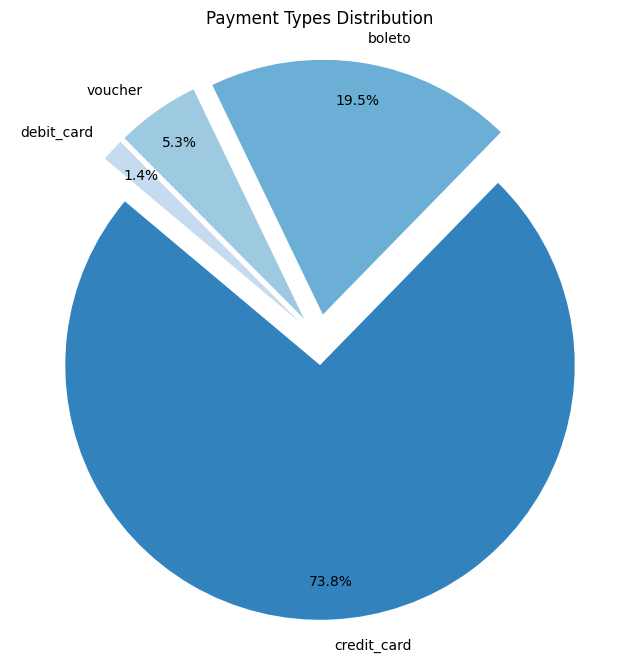

<Figure size 640x480 with 0 Axes>

In [34]:
# Get the value counts of the "payment_type" column
payment_type_counts = df7["payment_type"].value_counts()

# Plot the 3D pie chart
plt.figure(figsize=(8, 8))
explode = [0.1] * len(payment_type_counts)  # Explode all slices slightly for emphasis
colors = plt.cm.tab20c.colors[:len(payment_type_counts)]
plt.pie(payment_type_counts, labels=payment_type_counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title("Payment Types Distribution")
plt.axis('equal')
plt.show()
plt.savefig('high_resolution_plot.png', dpi=300)

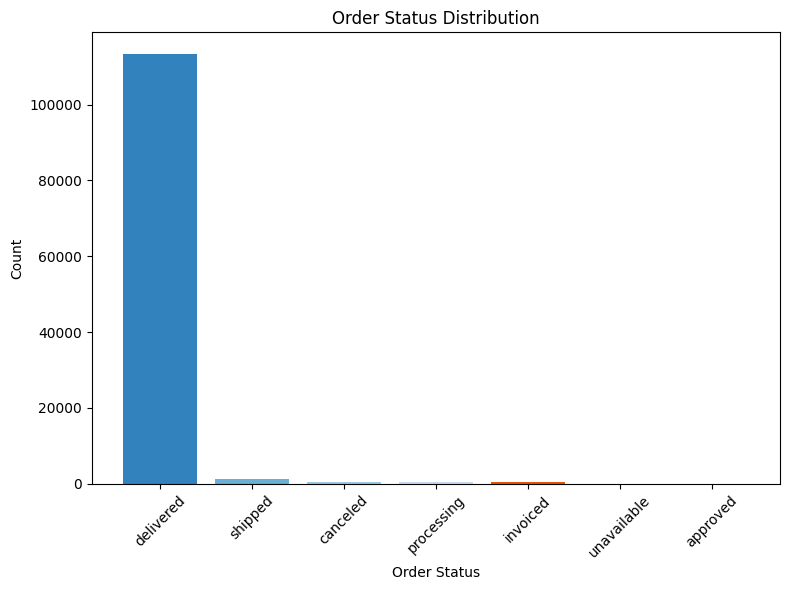

<Figure size 640x480 with 0 Axes>

In [35]:
payment_type_counts = df7["order_status"].value_counts()

plt.figure(figsize=(8, 6))
colors = plt.cm.tab20c.colors[:len(payment_type_counts)]
plt.bar(payment_type_counts.index, payment_type_counts.values, color=colors)
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.title("Order Status Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('high_resolution_plot.png', dpi=300)

In [36]:
payment_type = {'credit_card': 1, 'boleto': 2, 'voucher': 3, 'debit_card': 4}
# Convert text labels to digits
df7['payment_type'] = df7['payment_type'].map(payment_type)


In [37]:
order_status = {'delivered': 1, 'shipped': 2, 'canceled': 3, 'processing': 4, 'invoiced': 5,
                'unavailable': 6, 'approved': 7}
# Convert text labels to digits
df7['order_status'] = df7['order_status'].map(order_status)

In [38]:
#customer_id = pd.DataFrame(df7.pop('customer_id'))
#timestamp = pd.DataFrame(df7.pop('order_purchase_timestamp'))

In [39]:
df7.describe()

,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,order_status,order_purchase_timestamp,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000
mean,1.092820,1.343799,2.945350,173.020069,1.196304,120.931690,20.075433,1.042199,2017-12-31 11:00:01.568497408,35052.148557,48.767493,786.950182,2.207874,2117.675459,30.310279,16.658211,23.110179
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,1.000000,2016-09-04 21:15:19,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,1.000000,1.000000,61.010000,1.000000,39.900000,13.080000,1.000000,2017-09-12 16:06:10,11320.000000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,1.000000,2.000000,108.200000,1.000000,74.900000,16.320000,1.000000,2018-01-19 13:22:58,24315.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,2.000000,4.000000,189.720000,1.000000,134.900000,21.220000,1.000000,2018-05-04 19:53:53.750000128,58527.250000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,29.000000,4.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,7.000000,2018-09-03 09:06:57,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,0.725244,0.646429,2.779846,268.078052,0.699508,184.184747,15.870027,0.328362,NaN,29812.814013,10.035000,653.039008,1.719536,3785.543670,16.224730,13.479965,11.757155


### OUTLIER DETECTION AND HANDLING

In [40]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [41]:
df7.describe()

,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,order_status,order_purchase_timestamp,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000
mean,1.092820,1.343799,2.945350,173.020069,1.196304,120.931690,20.075433,1.042199,2017-12-31 11:00:01.568497408,35052.148557,48.767493,786.950182,2.207874,2117.675459,30.310279,16.658211,23.110179
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,1.000000,2016-09-04 21:15:19,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,1.000000,1.000000,61.010000,1.000000,39.900000,13.080000,1.000000,2017-09-12 16:06:10,11320.000000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,1.000000,2.000000,108.200000,1.000000,74.900000,16.320000,1.000000,2018-01-19 13:22:58,24315.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,2.000000,4.000000,189.720000,1.000000,134.900000,21.220000,1.000000,2018-05-04 19:53:53.750000128,58527.250000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,29.000000,4.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,7.000000,2018-09-03 09:06:57,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,0.725244,0.646429,2.779846,268.078052,0.699508,184.184747,15.870027,0.328362,NaN,29812.814013,10.035000,653.039008,1.719536,3785.543670,16.224730,13.479965,11.757155


In [42]:
df7.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'price',
       'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [43]:
numeric_columns = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'price',
                   'freight_value', 'customer_zip_code_prefix', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

# Calculate z-scores for each numeric column
z_scores = np.abs((df7[numeric_columns] - df7[numeric_columns].mean()) / df7[numeric_columns].std())

threshold = 3

outlier_mask = z_scores > threshold

outliers_count = outlier_mask.sum()

print(outliers_count)

payment_sequential             998
payment_type                  1662
payment_installments           403
payment_value                 1806
price                         2064
freight_value                 2098
customer_zip_code_prefix         0
product_name_lenght            577
product_description_lenght    2857
product_photos_qty            1642
product_weight_g              3012
product_length_cm             2313
product_height_cm             2793
product_width_cm              1803
dtype: int64


In [44]:
# Replace outliers with the median value of their respective columns
df7[numeric_columns] = np.where(outlier_mask, df7[numeric_columns].median(), df7[numeric_columns])

In [45]:
numeric_columns = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'price',
                   'freight_value', 'customer_zip_code_prefix', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

# Calculate z-scores for each numeric column
z_scores_after = np.abs((df7[numeric_columns] - df7[numeric_columns].mean()) / df7[numeric_columns].std())

# Threshold for outlier detection (you can adjust this value based on your requirement)
threshold = 3

# Create a mask for outliers after handling
outlier_mask_after = z_scores_after > threshold

# Check if any z-scores are still greater than the threshold
if outlier_mask_after.any().any():
    print("Outliers are still present in the dataframe.")
else:
    print("Outliers have been resolved in the dataframe.")

Outliers are still present in the dataframe.


In [46]:
numeric_columns = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'price',
                   'freight_value', 'customer_zip_code_prefix', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

# Calculate z-scores for each numeric column
z_scores_after = np.abs((df7[numeric_columns] - df7[numeric_columns].mean()) / df7[numeric_columns].std())

# Threshold for outlier detection (you can adjust this value based on your requirement)
threshold = 3

# Create a mask for outliers after handling
outlier_mask_after = z_scores_after > threshold

# Handle the outliers by capping them at the threshold value
capped_df = df7.copy()

for col in numeric_columns:
    capped_df[col] = np.where(outlier_mask_after[col], np.sign(df7[col]) * threshold, df7[col])

# Check if any z-scores are still greater than the threshold after handling
if outlier_mask_after.any().any():
    print("Outliers are still present in the dataframe.")
else:
    print("Outliers have been resolved in the dataframe.")

Outliers are still present in the dataframe.


In [47]:
df7[numeric_columns]

,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1.0,1.0,8.0,99.33,79.80,19.53,39801.0,57.0,921.0,1.0,800.0,17.0,27.0,17.0
1,1.0,1.0,4.0,93.72,79.80,13.92,14781.0,57.0,921.0,1.0,800.0,17.0,27.0,17.0
2,1.0,1.0,1.0,24.39,17.00,7.39,2422.0,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,1.0,1.0,1.0,65.71,56.99,8.72,2652.0,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
4,1.0,1.0,1.0,68.89,56.99,11.90,37550.0,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,1.0,1.0,2.0,83.09,74.82,8.27,35570.0,58.0,813.0,1.0,600.0,20.0,10.0,15.0
117597,1.0,1.0,1.0,26.37,18.98,7.39,3223.0,38.0,459.0,1.0,250.0,18.0,19.0,18.0
117598,1.0,1.0,1.0,60.69,44.90,15.79,41100.0,39.0,411.0,3.0,350.0,23.0,23.0,23.0
117599,1.0,1.0,2.0,198.94,179.80,19.14,85869.0,35.0,537.0,2.0,7400.0,45.0,29.0,53.0


In [48]:
df7.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,customer_id,order_status,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,1.0,8.0,99.33,1,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,1,...,teofilo otoni,MG,casa_construcao,57.0,921.0,1.0,800.0,17.0,27.0,17.0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,1.0,4.0,93.72,1,79.80,13.92,0e37385834260d6111727103a93e790a,1,...,barretos,SP,casa_construcao,57.0,921.0,1.0,800.0,17.0,27.0,17.0
2,a9810da82917af2d9aefd1278f1dcfa0,1.0,1.0,1.0,24.39,1,17.00,7.39,f2c7fc58a9de810828715166c672f10a,1,...,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,1.0,1.0,65.71,1,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,1,...,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
4,1966886b80f14d0588adf6406afb0026,1.0,1.0,1.0,68.89,1,56.99,11.90,7238ed1e0d25683b9b65e1039e9d942b,5,...,pouso alegre,MG,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0


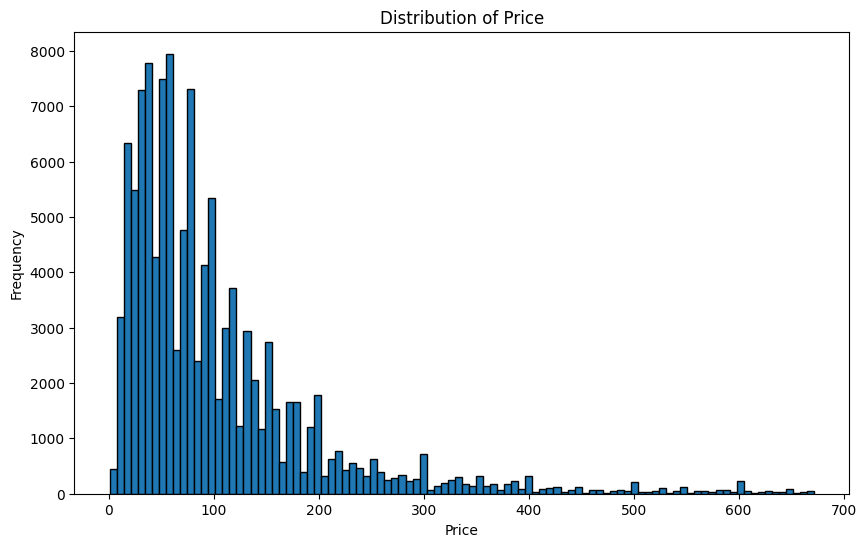

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df7["price"], bins=100, edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price")
plt.show()

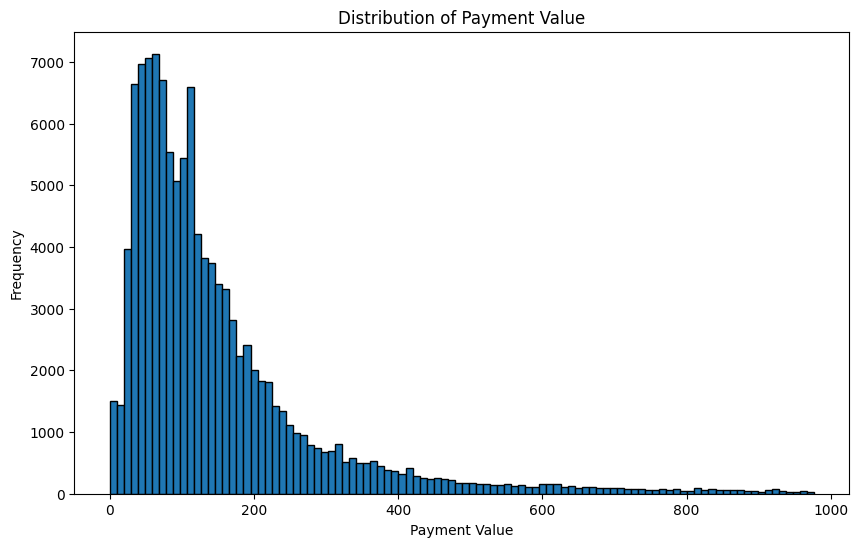

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(df7["payment_value"], bins=100, edgecolor='black')
plt.xlabel("Payment Value")
plt.ylabel("Frequency")
plt.title("Distribution of Payment Value")
plt.show()

### UNIVARIATE ANALYSIS

### FEATURE ENGINEERING

In [51]:
!pip install lifetimes
import lifetimes
import datetime as dt
from lifetimes.utils import *
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions,plot_incremental_transactions
from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive
import matplotlib as mpl
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_26216\3046071451.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [52]:
df7.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,customer_id,order_status,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,1.0,8.0,99.33,1,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,1,...,teofilo otoni,MG,casa_construcao,57.0,921.0,1.0,800.0,17.0,27.0,17.0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,1.0,4.0,93.72,1,79.80,13.92,0e37385834260d6111727103a93e790a,1,...,barretos,SP,casa_construcao,57.0,921.0,1.0,800.0,17.0,27.0,17.0
2,a9810da82917af2d9aefd1278f1dcfa0,1.0,1.0,1.0,24.39,1,17.00,7.39,f2c7fc58a9de810828715166c672f10a,1,...,sao paulo,SP,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,1.0,1.0,65.71,1,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,1,...,sao paulo,SP,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
4,1966886b80f14d0588adf6406afb0026,1.0,1.0,1.0,68.89,1,56.99,11.90,7238ed1e0d25683b9b65e1039e9d942b,5,...,pouso alegre,MG,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0


In [53]:
df7["order_purchase_timestamp"].max()

Timestamp('2018-09-03 09:06:57')

In [54]:
recency_df = df7.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency_df['Recency'] = (pd.to_datetime('2018-09-03') - pd.to_datetime(recency_df['order_purchase_timestamp'])).dt.days

# Perform Frequency analysis
frequency_df = df7.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True)

# Perform Monetary analysis
monetary_df = df7.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.rename(columns={'payment_value': 'Monetary'}, inplace=True)

# Merge Recency, Frequency, and Monetary DataFrames
rfm_df = pd.merge(recency_df[['customer_unique_id', 'Recency']], frequency_df, on='customer_unique_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_unique_id')

In [55]:
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [56]:
rfm_df.to_excel("C:\\Users\\HP\\OneDrive\\Documents\\Masters' Degree Program\\2nd Semester\\Master's Project\\Datasets\\Brazilian E_commerce Dataset\\rfm_df.xlsx")

In [57]:
plt.rcParams['font.family'] = 'sans-serif'

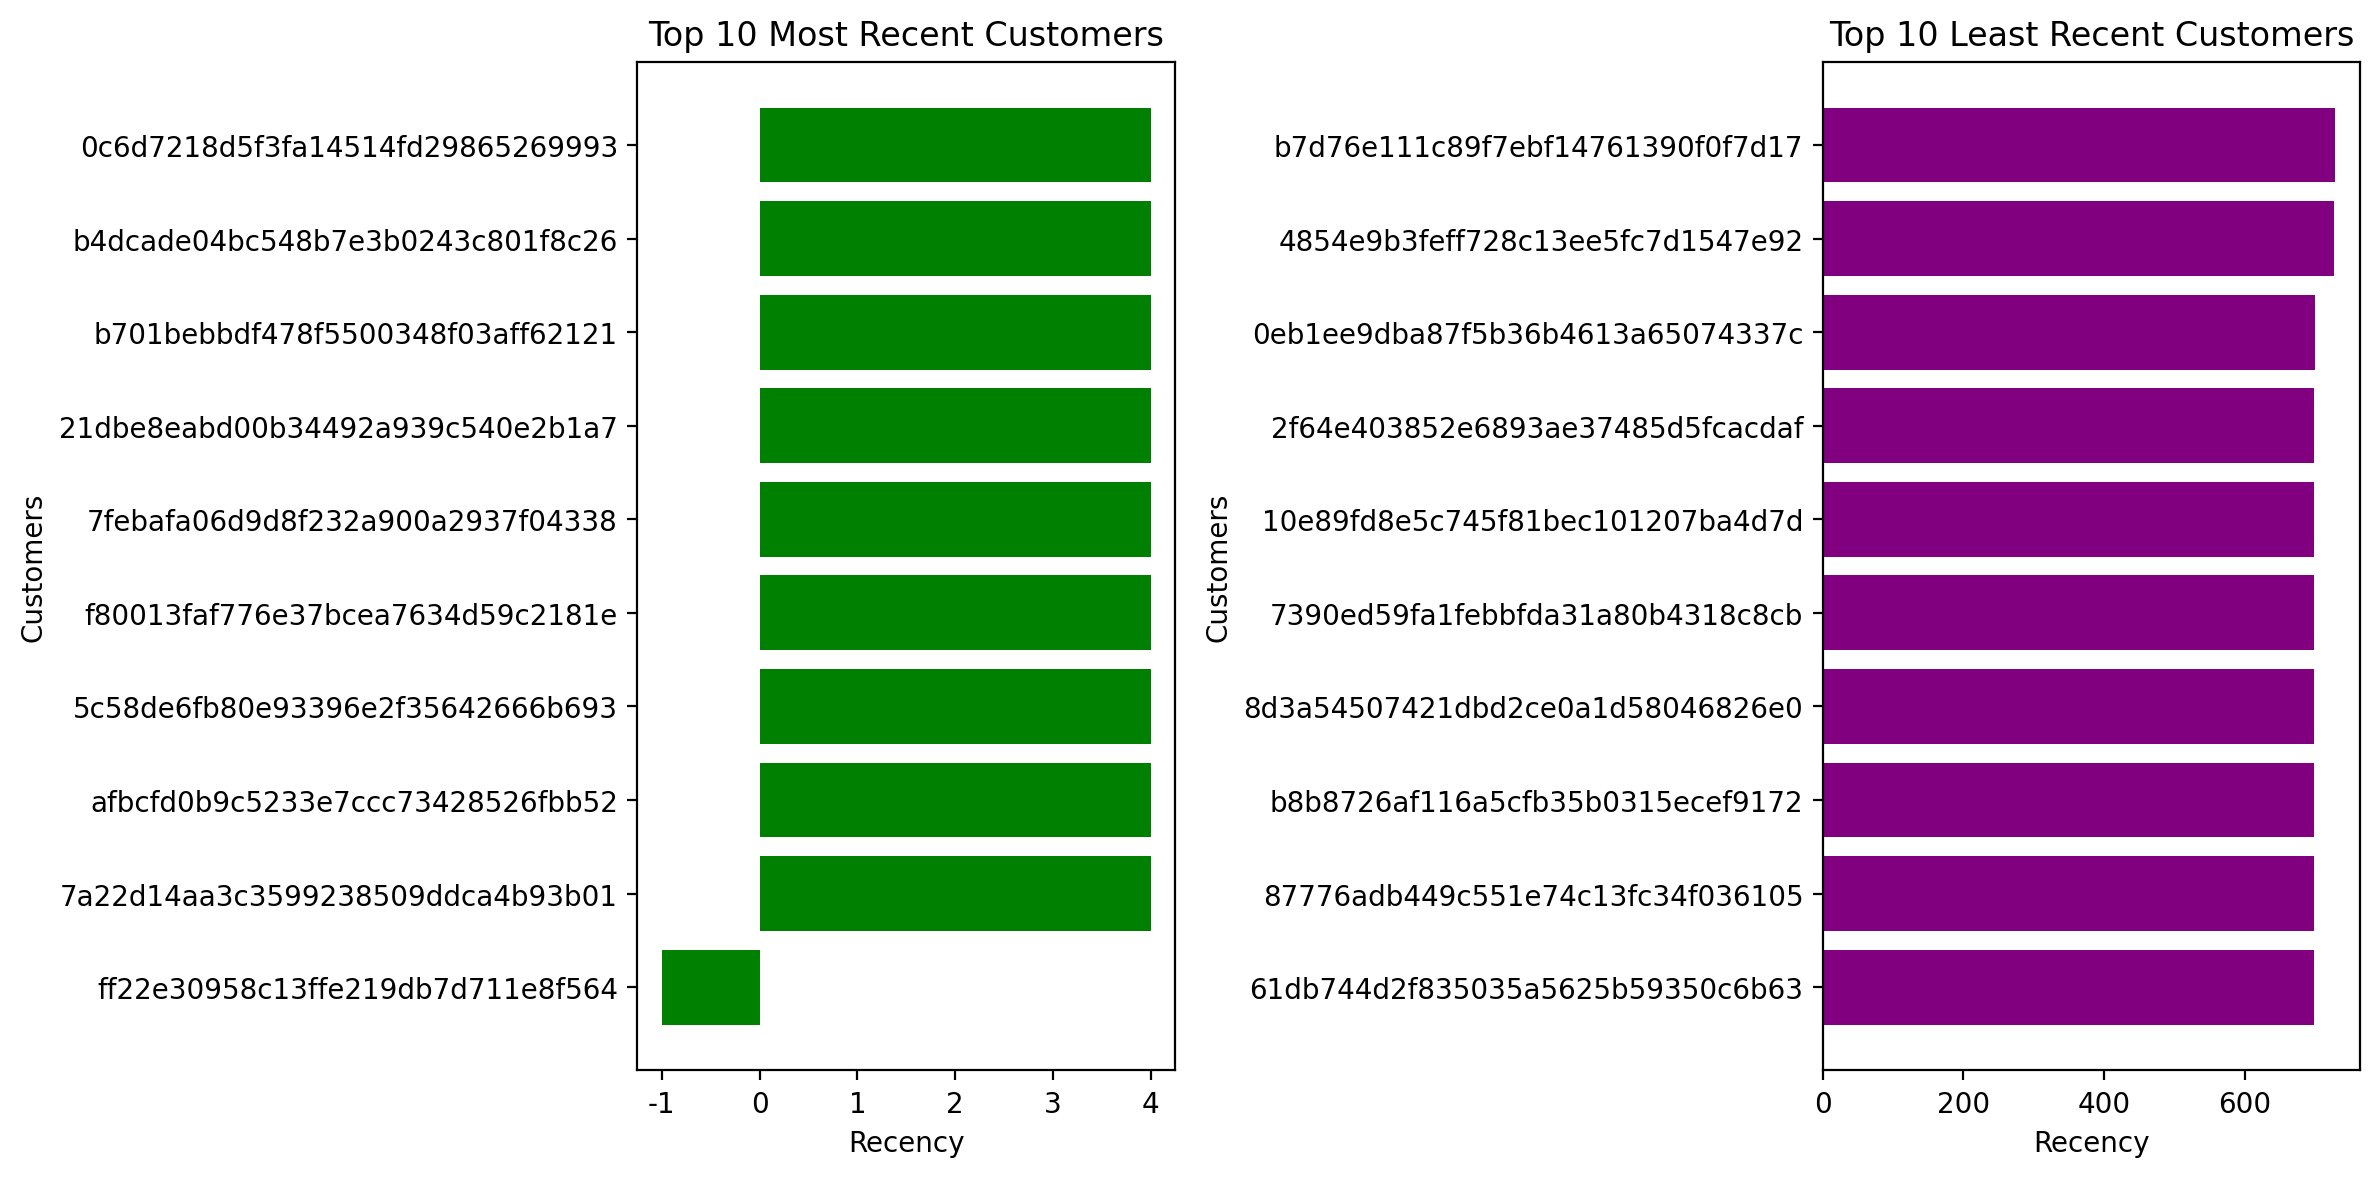

In [58]:
# Sort the dataframe by recency
recency_df = recency_df.sort_values(by='Recency')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 5 Most Recent Customers
ax1.barh(recency_df['customer_unique_id'][:10], recency_df['Recency'][:10], color='green')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Customers')
ax1.set_title('Top 10 Most Recent Customers')

# Plot for 5 Least Recent Customers
ax2.barh(recency_df['customer_unique_id'][-10:], recency_df['Recency'][-10:], color='purple')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Customers')
ax2.set_title('Top 10 Least Recent Customers')

# Adjust layout
plt.tight_layout()

plt.show()

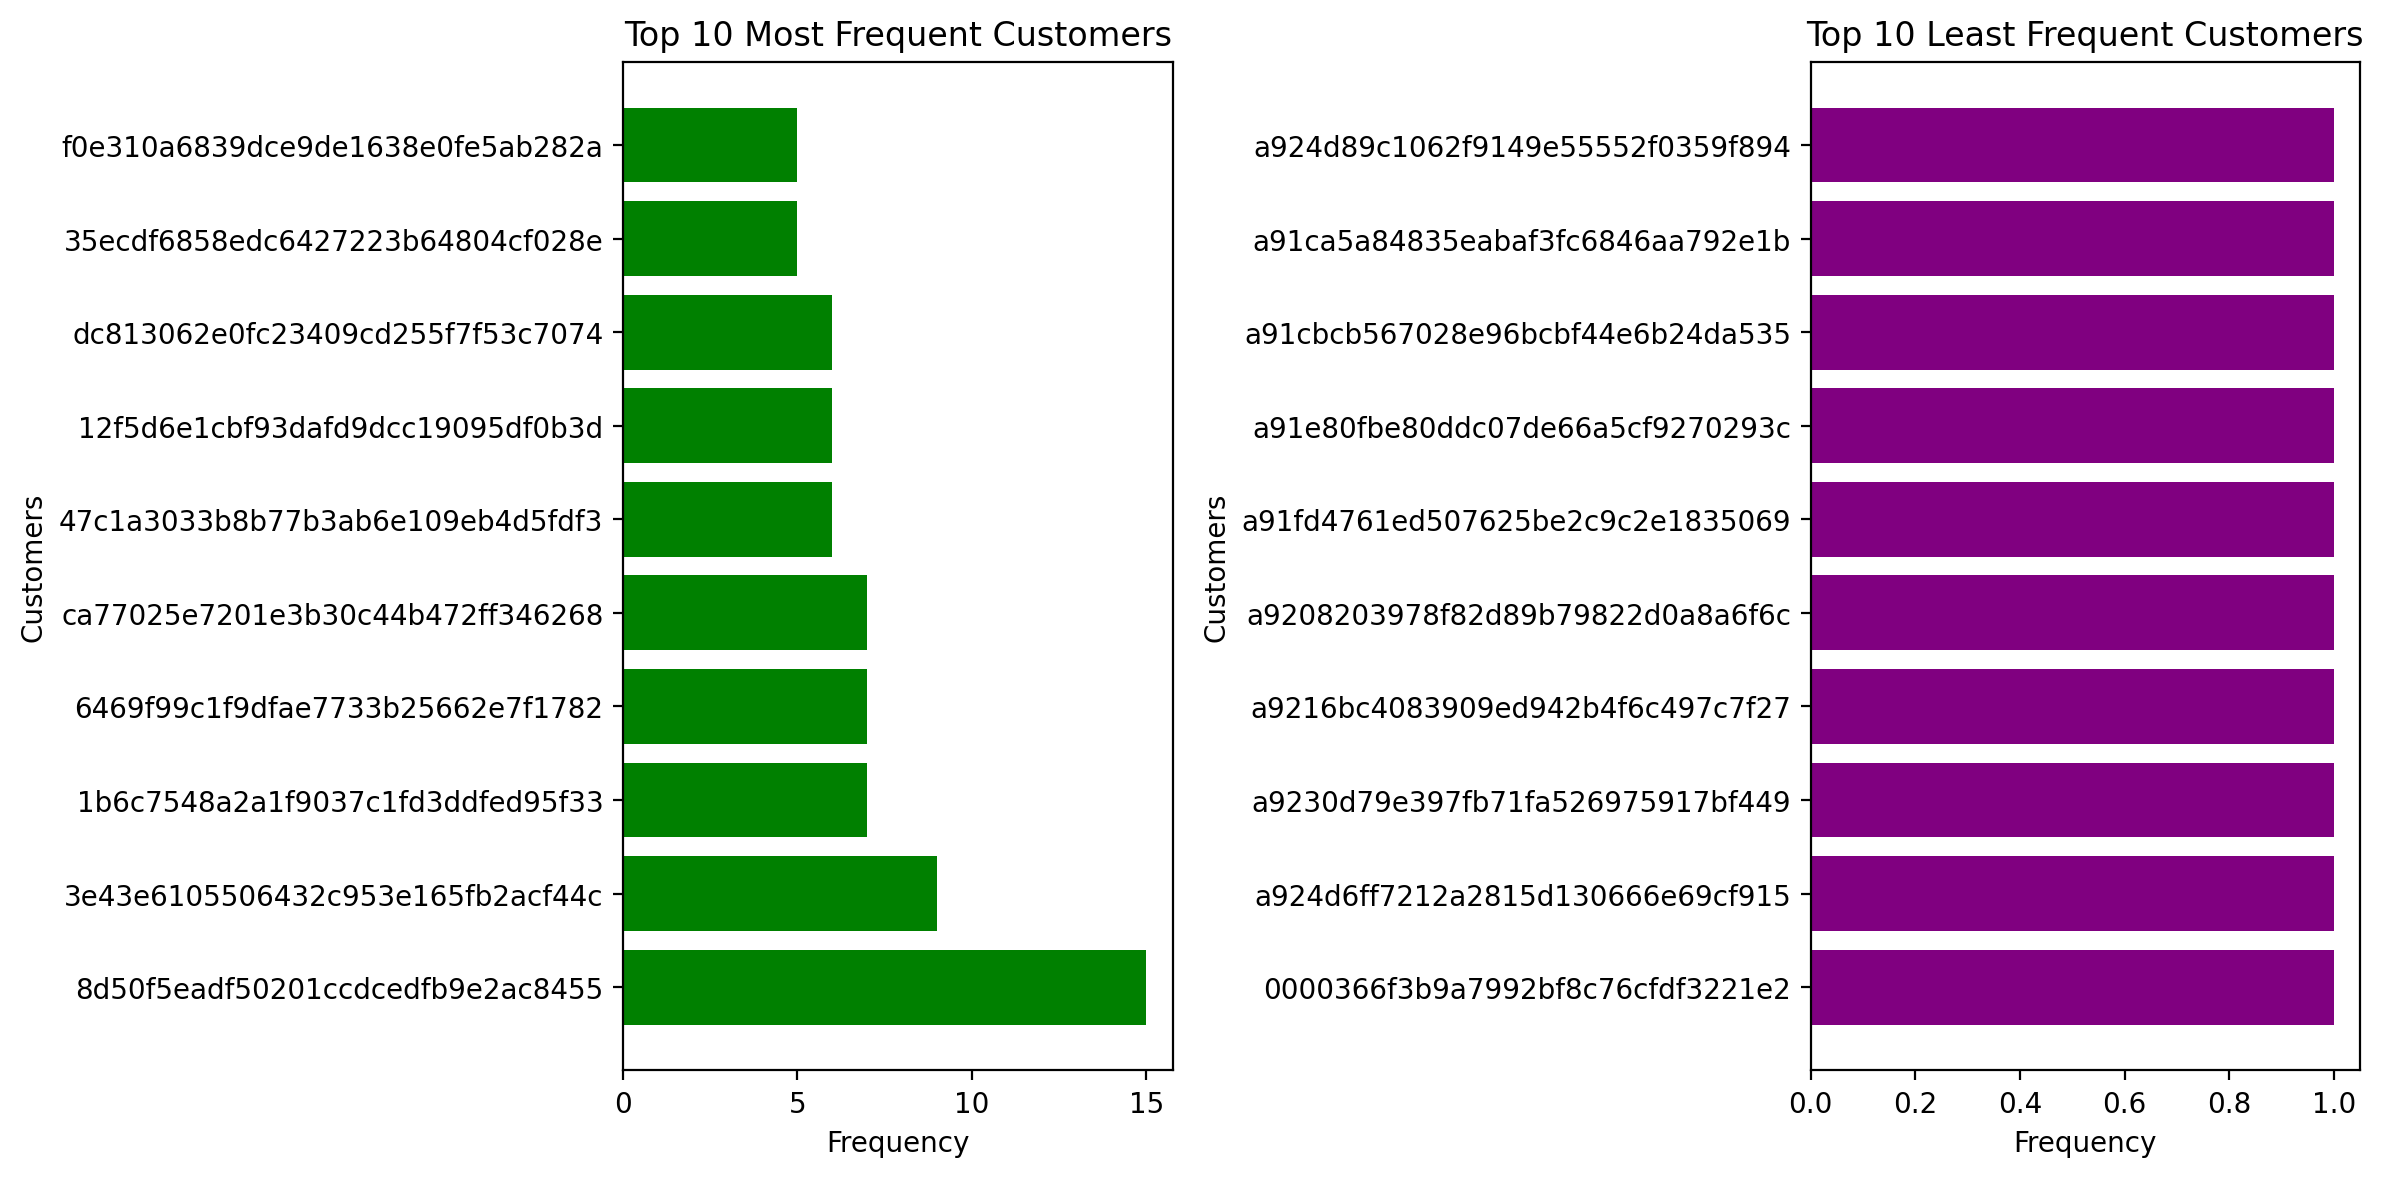

In [59]:
# Sort the dataframe by Frequency for most and least frequent customers
most_frequent_customers = rfm_df.sort_values(by='Frequency', ascending=False).head(10)
least_frequent_customers = rfm_df.sort_values(by='Frequency').head(10)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 10 Most Frequent Customers
ax1.barh(most_frequent_customers['customer_unique_id'], most_frequent_customers['Frequency'], color='green')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Customers')
ax1.set_title('Top 10 Most Frequent Customers')

# Plot for 10 Least Frequent Customers
ax2.barh(least_frequent_customers['customer_unique_id'], least_frequent_customers['Frequency'], color='purple')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Customers')
ax2.set_title('Top 10 Least Frequent Customers')

# Adjust layout
plt.tight_layout()

plt.show()

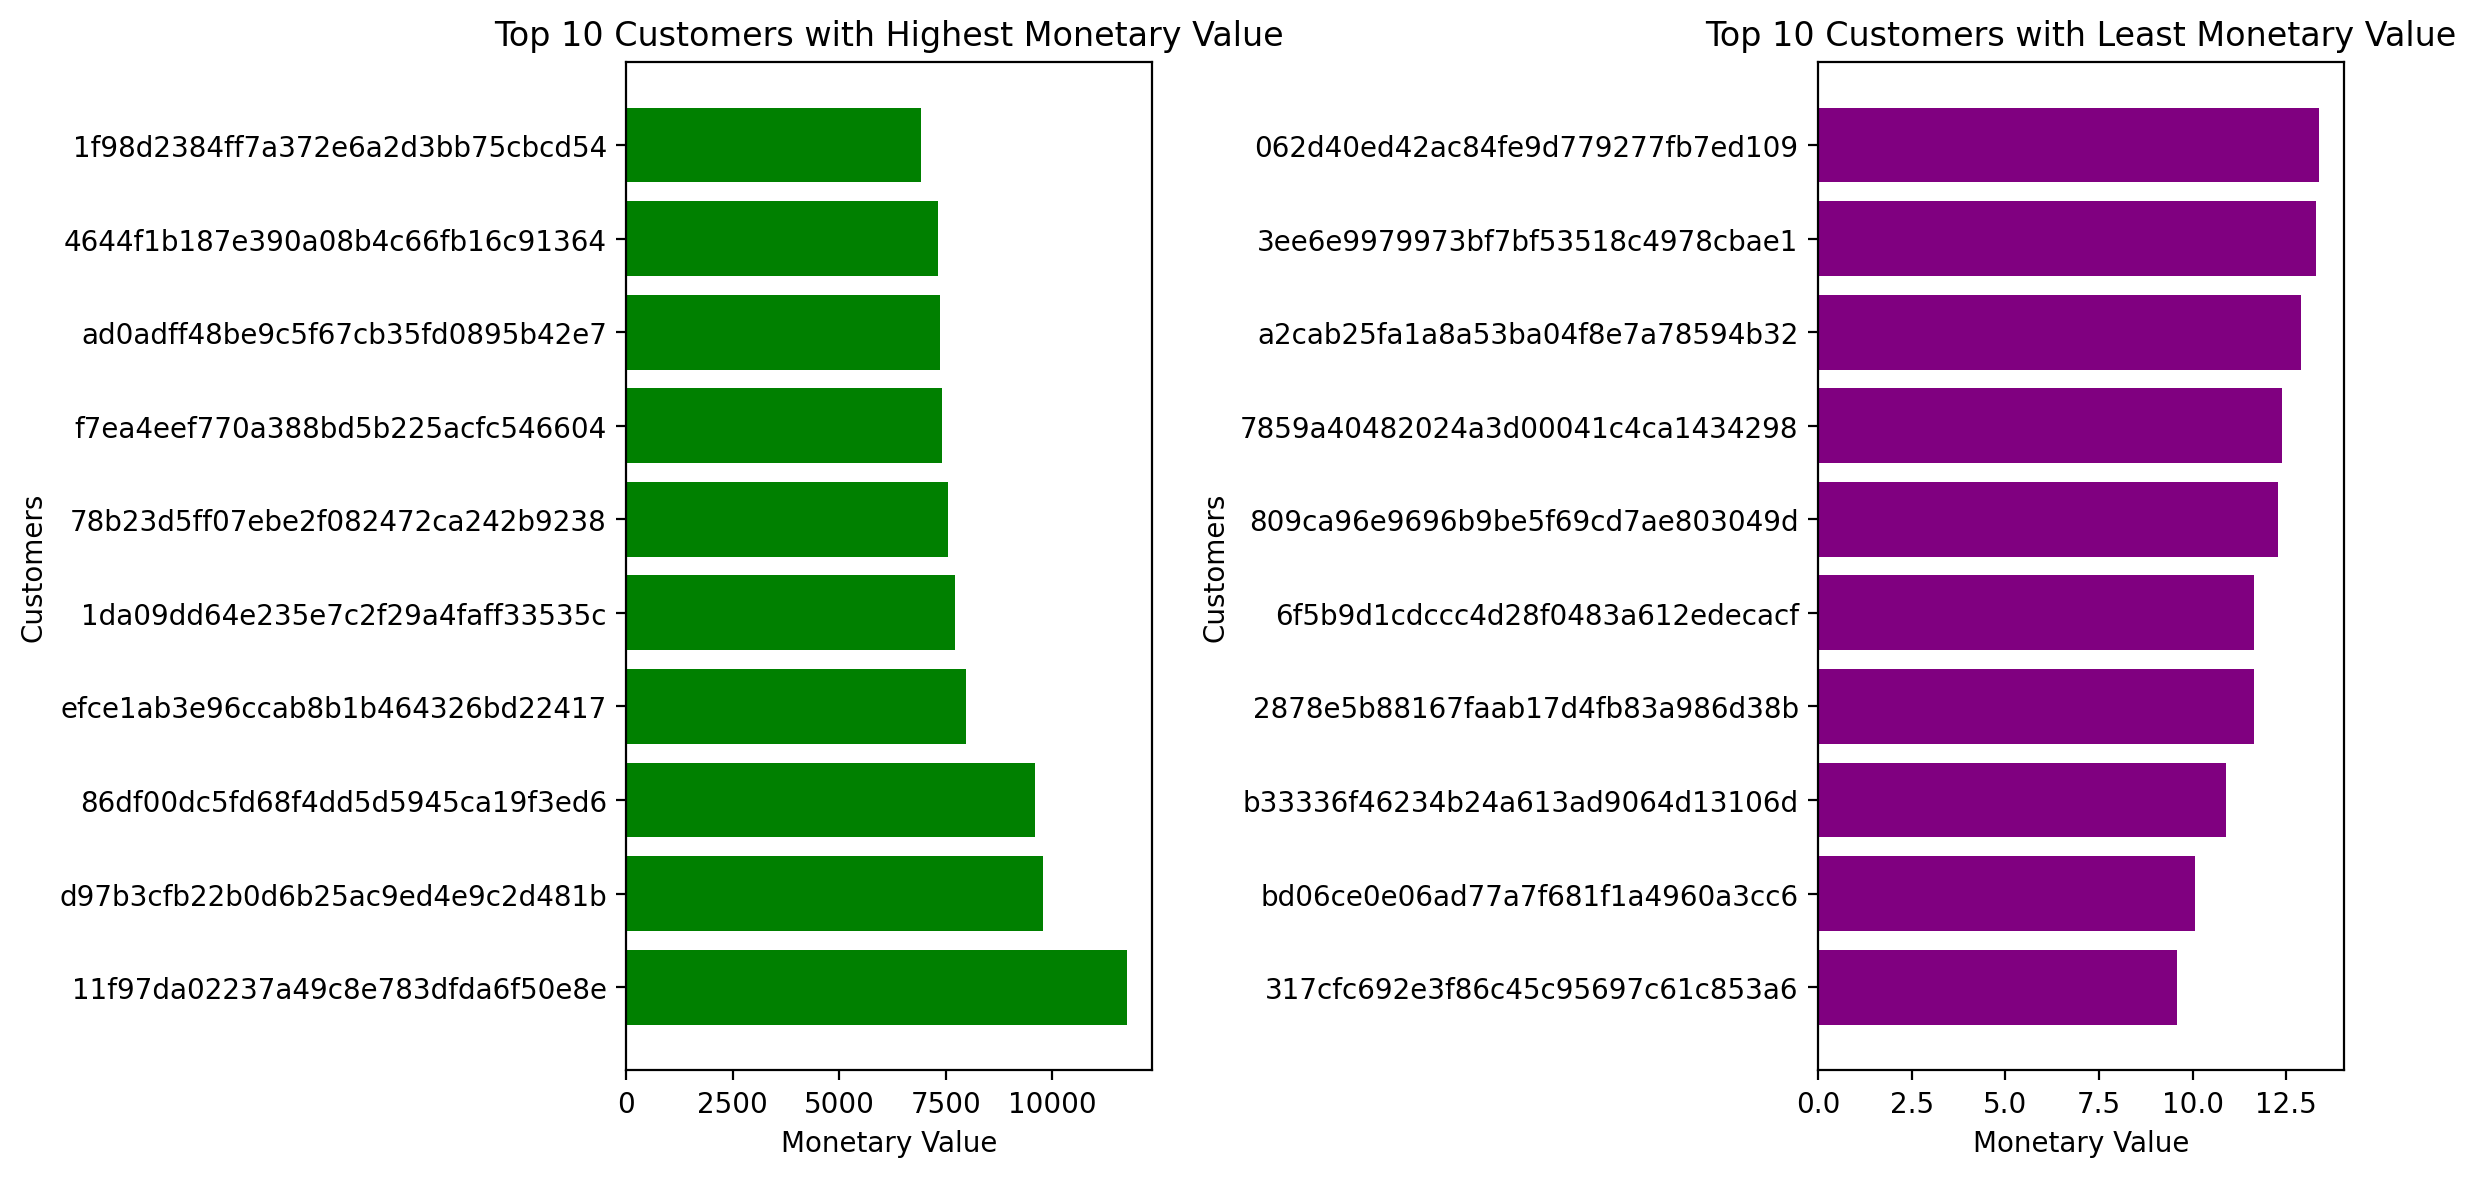

In [60]:
# Sort the dataframe by Monetary for highest and least monetary customers
highest_monetary_customers = rfm_df.sort_values(by='Monetary', ascending=False).head(10)
least_monetary_customers = rfm_df.sort_values(by='Monetary', ascending=True).head(10)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 10 Customers with Highest Monetary Value
ax1.barh(highest_monetary_customers['customer_unique_id'], highest_monetary_customers['Monetary'], color='green')
ax1.set_xlabel('Monetary Value')
ax1.set_ylabel('Customers')
ax1.set_title('Top 10 Customers with Highest Monetary Value')

# Plot for 10 Customers with Least Monetary Value
ax2.barh(least_monetary_customers['customer_unique_id'], least_monetary_customers['Monetary'], color='purple')
ax2.set_xlabel('Monetary Value')
ax2.set_ylabel('Customers')
ax2.set_title('Top 10 Customers with Least Monetary Value')

# Adjust layout
plt.tight_layout()

plt.show()

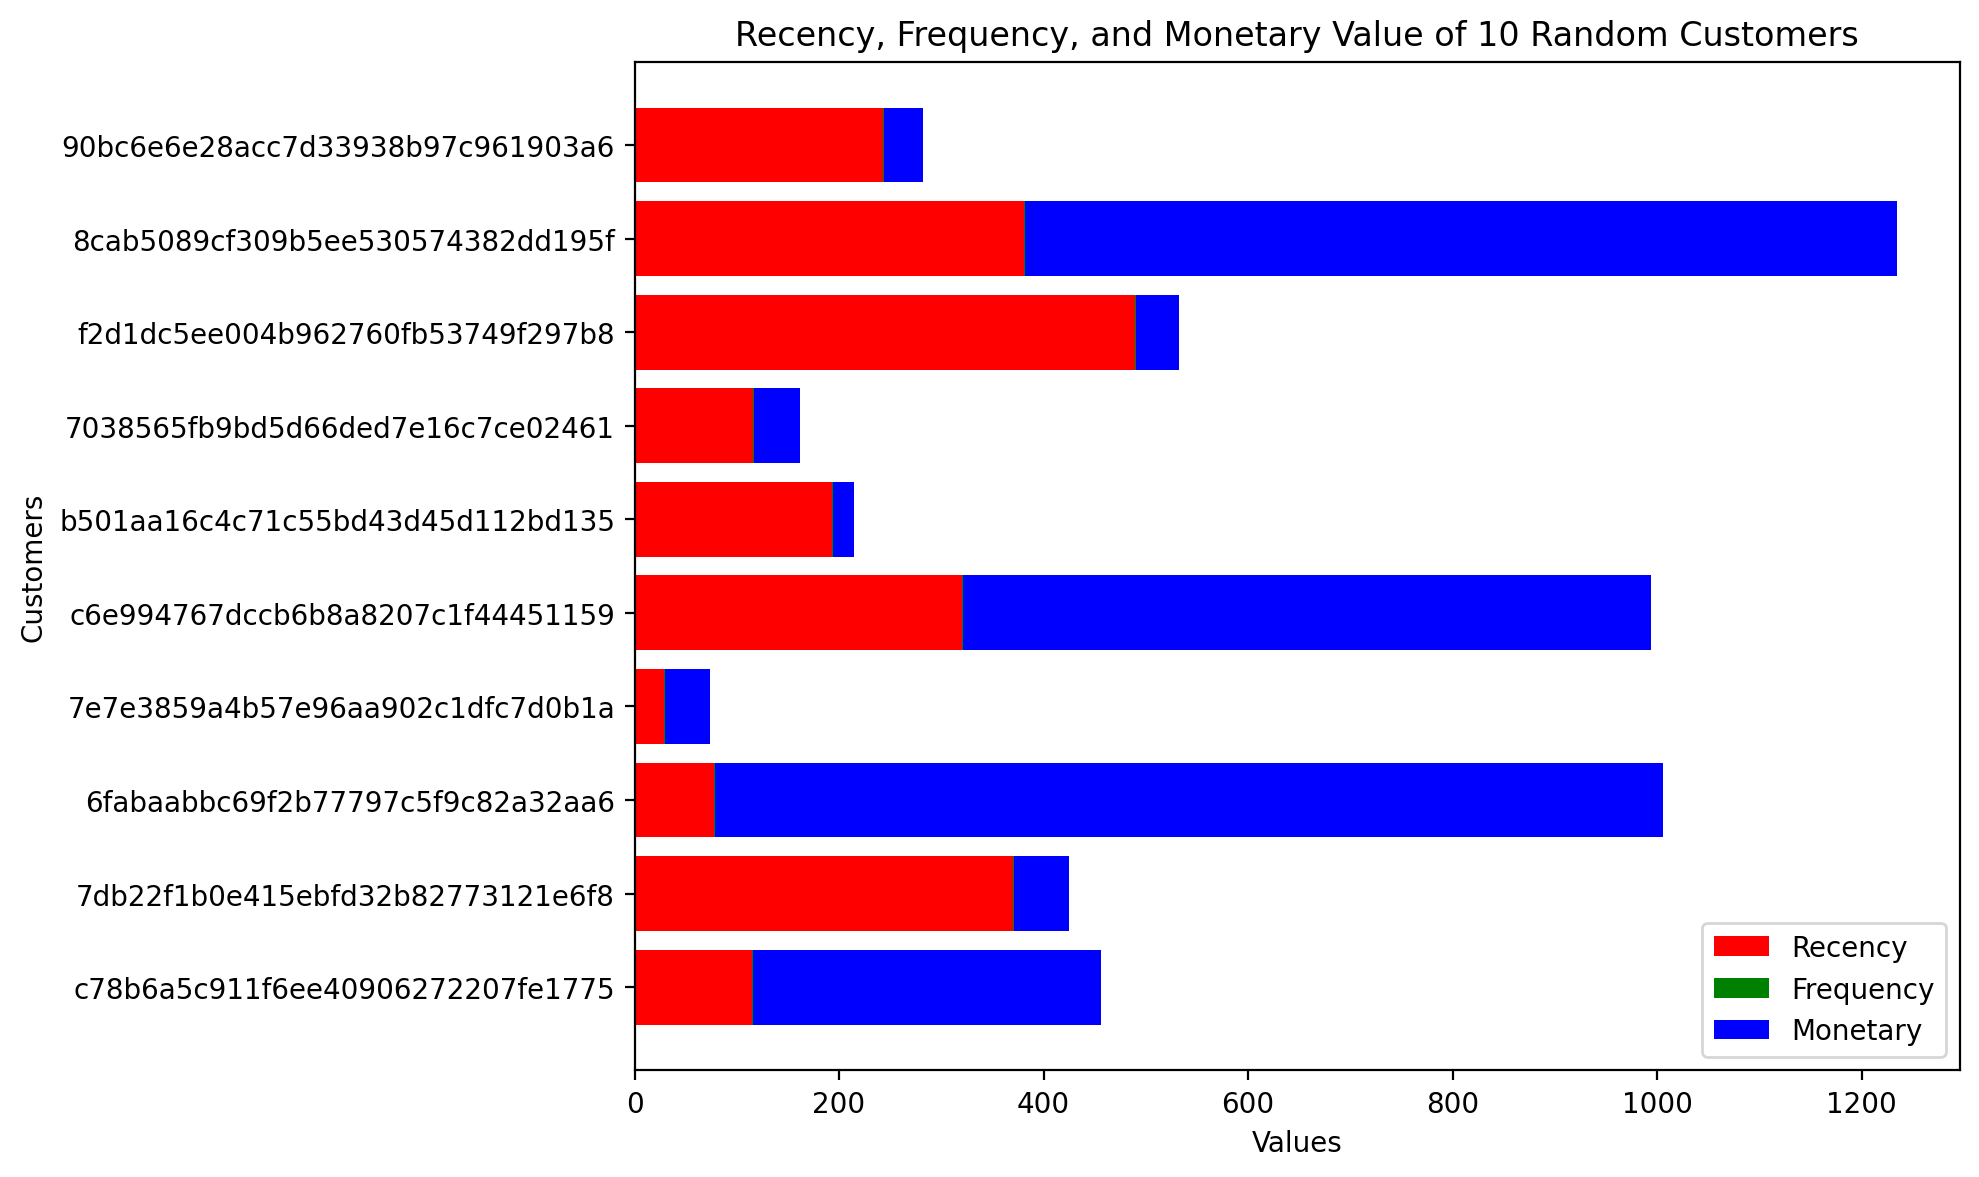

In [61]:
# Select first 10 random customers
random_customers = rfm_df.sample(n=10, random_state=42)

# Create a stacked horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(random_customers['customer_unique_id'], random_customers['Recency'], color='red', label='Recency')
plt.barh(random_customers['customer_unique_id'], random_customers['Frequency'], color='green', 
         label='Frequency', left=random_customers['Recency'])
plt.barh(random_customers['customer_unique_id'], random_customers['Monetary'], color='blue', 
         label='Monetary', left=random_customers['Recency'] + random_customers['Frequency'])
plt.xlabel('Values')
plt.ylabel('Customers')
plt.title('Recency, Frequency, and Monetary Value of 10 Random Customers')
plt.legend()

# Adjust layout
plt.tight_layout()

plt.show()

In [62]:
rfm_df['Monetary'].value_counts()

Monetary
108.20    896
77.57     241
35.00     160
73.34     147
116.94    125
         ... 
439.50      1
203.18      1
861.76      1
145.64      1
710.70      1
Name: count, Length: 29649, dtype: int64

In [63]:
Recency_threshold = 100  # The number of days since the last purchase after which a customer is considered churned
Frequency_threshold = 5  # The number of purchases made by a customer below which they are considered churned
Monetary_threshold = 100 # The number for monetary value of a customer below which they are considered churned

# Add a new 'churn' column to indicate churned customers (0) and non-churned customers (1)
rfm_df['churn'] = (rfm_df['Recency'] > Recency_threshold) & (rfm_df['Frequency'] <= Frequency_threshold) & (rfm_df['Monetary'] > Monetary_threshold)

rfm_df['churn'] = rfm_df['churn'].astype(int)

rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,0
2,0000f46a3911fa3c0805444483337064,541,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1


In [64]:
rfm_df["churn"].value_counts()

churn
0    52854
1    41252
Name: count, dtype: int64

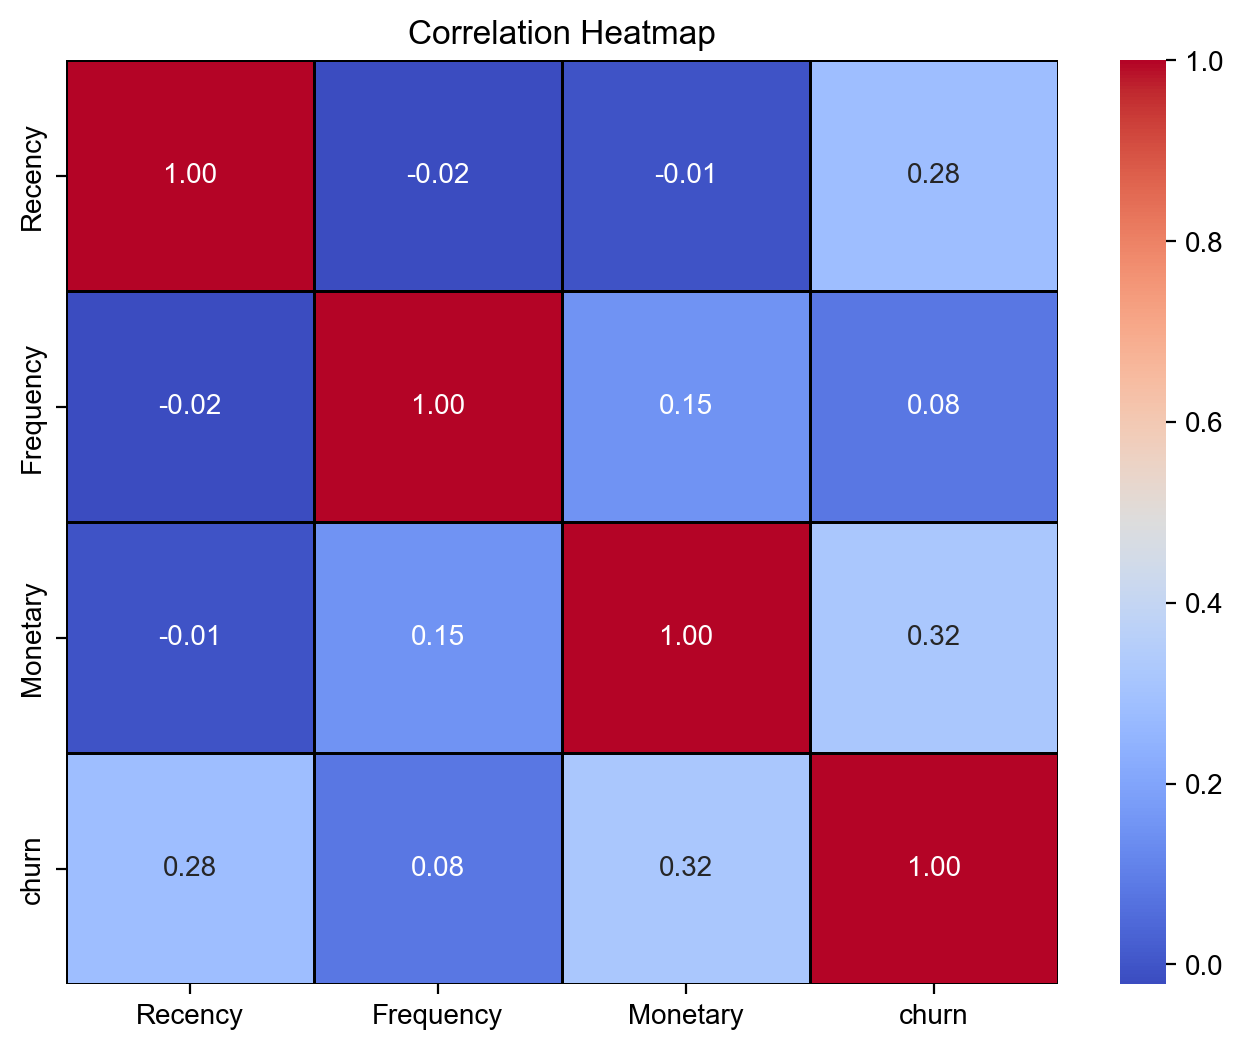

In [65]:
plt.rcParams['font.family'] = 'Arial'
# Select the desired columns
selected_columns = ['Recency', 'Frequency', 'Monetary', 'churn']

df_selected = rfm_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor = "black")
plt.title('Correlation Heatmap')
plt.show()

In [66]:
join_df = df7.merge(rfm_df, on='customer_unique_id', how='inner')
join_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,customer_id,order_status,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Recency,Frequency,Monetary,churn
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,1.0,8.0,99.33,1,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,1,...,921.0,1.0,800.0,17.0,27.0,17.0,130,1,99.33,0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1.0,1.0,4.0,93.72,1,79.80,13.92,0e37385834260d6111727103a93e790a,1,...,921.0,1.0,800.0,17.0,27.0,17.0,140,1,93.72,0
2,a9810da82917af2d9aefd1278f1dcfa0,1.0,1.0,1.0,24.39,1,17.00,7.39,f2c7fc58a9de810828715166c672f10a,1,...,1274.0,2.0,150.0,16.0,6.0,11.0,68,1,24.39,0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,1.0,1.0,65.71,1,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,1,...,1536.0,2.0,250.0,20.0,8.0,21.0,264,1,65.71,0
4,1966886b80f14d0588adf6406afb0026,1.0,1.0,1.0,68.89,1,56.99,11.90,7238ed1e0d25683b9b65e1039e9d942b,5,...,1536.0,2.0,250.0,20.0,8.0,21.0,376,1,68.89,0


In [67]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115902 entries, 0 to 115901
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    115902 non-null  object        
 1   payment_sequential          115902 non-null  float64       
 2   payment_type                115902 non-null  float64       
 3   payment_installments        115902 non-null  float64       
 4   payment_value               115902 non-null  float64       
 5   order_item_id               115902 non-null  int64         
 6   price                       115902 non-null  float64       
 7   freight_value               115902 non-null  float64       
 8   customer_id                 115902 non-null  object        
 9   order_status                115902 non-null  int64         
 10  order_purchase_timestamp    115902 non-null  datetime64[ns]
 11  customer_unique_id          115902 non-

In [68]:
columns_to_drop =['order_id', 'customer_id', 'order_purchase_timestamp', 'customer_unique_id', 
                  'customer_city', 'customer_state', 'product_category_name']
data = join_df.drop(columns=columns_to_drop)
data.head(5)

,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,order_status,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Recency,Frequency,Monetary,churn
0,1.0,1.0,8.0,99.33,1,79.80,19.53,1,39801.0,57.0,921.0,1.0,800.0,17.0,27.0,17.0,130,1,99.33,0
1,1.0,1.0,4.0,93.72,1,79.80,13.92,1,14781.0,57.0,921.0,1.0,800.0,17.0,27.0,17.0,140,1,93.72,0
2,1.0,1.0,1.0,24.39,1,17.00,7.39,1,2422.0,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,68,1,24.39,0
3,1.0,1.0,1.0,65.71,1,56.99,8.72,1,2652.0,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,264,1,65.71,0
4,1.0,1.0,1.0,68.89,1,56.99,11.90,5,37550.0,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,376,1,68.89,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115902 entries, 0 to 115901
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   payment_sequential          115902 non-null  float64
 1   payment_type                115902 non-null  float64
 2   payment_installments        115902 non-null  float64
 3   payment_value               115902 non-null  float64
 4   order_item_id               115902 non-null  int64  
 5   price                       115902 non-null  float64
 6   freight_value               115902 non-null  float64
 7   order_status                115902 non-null  int64  
 8   customer_zip_code_prefix    115902 non-null  float64
 9   product_name_lenght         115902 non-null  float64
 10  product_description_lenght  115902 non-null  float64
 11  product_photos_qty          115902 non-null  float64
 12  product_weight_g            115902 non-null  float64
 13  product_length

In [70]:
# Drop duplicates, keeping the first occurrence
data = data.drop_duplicates(keep='first')
print("\nDataFrame after dropping duplicates:")
data.head()


DataFrame after dropping duplicates:


,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,order_status,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Recency,Frequency,Monetary,churn
0,1.0,1.0,8.0,99.33,1,79.80,19.53,1,39801.0,57.0,921.0,1.0,800.0,17.0,27.0,17.0,130,1,99.33,0
1,1.0,1.0,4.0,93.72,1,79.80,13.92,1,14781.0,57.0,921.0,1.0,800.0,17.0,27.0,17.0,140,1,93.72,0
2,1.0,1.0,1.0,24.39,1,17.00,7.39,1,2422.0,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,68,1,24.39,0
3,1.0,1.0,1.0,65.71,1,56.99,8.72,1,2652.0,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,264,1,65.71,0
4,1.0,1.0,1.0,68.89,1,56.99,11.90,5,37550.0,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,376,1,68.89,0


In [71]:
data['churn'].value_counts()

churn
0    59107
1    56401
Name: count, dtype: int64

In [72]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['payment_installments',	'payment_value', 'price', 'freight_value', 'order_status', 
                    'customer_zip_code_prefix', 'product_name_lenght', 'product_description_lenght',
                       'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
                        'product_width_cm', 'Recency', 'Frequency',	'Monetary',	'churn']
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,price,freight_value,order_status,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Recency,Frequency,Monetary,churn
0,1.0,1.0,0.727273,0.101667,1,0.117634,0.288564,0.000000,0.391990,0.666667,0.334427,0.000000,0.059480,0.140845,0.454545,0.211538,0.179698,0.0,0.007647,0.0
1,1.0,1.0,0.363636,0.095925,1,0.117634,0.205674,0.000000,0.139204,0.666667,0.334427,0.000000,0.059480,0.140845,0.454545,0.211538,0.193416,0.0,0.007169,0.0
2,1.0,1.0,0.090909,0.024964,1,0.024063,0.109190,0.000000,0.014337,0.701754,0.463166,0.166667,0.011152,0.126761,0.072727,0.096154,0.094650,0.0,0.001261,0.0
3,1.0,1.0,0.090909,0.067256,1,0.083647,0.128842,0.000000,0.016660,0.614035,0.558716,0.166667,0.018587,0.183099,0.109091,0.288462,0.363512,0.0,0.004782,0.0
4,1.0,1.0,0.090909,0.070511,1,0.083647,0.175827,0.666667,0.369247,0.614035,0.558716,0.166667,0.018587,0.183099,0.109091,0.288462,0.517147,0.0,0.005053,0.0


In [73]:
data.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'price', 'freight_value',
       'order_status', 'customer_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'Recency',
       'Frequency', 'Monetary', 'churn'],
      dtype='object')

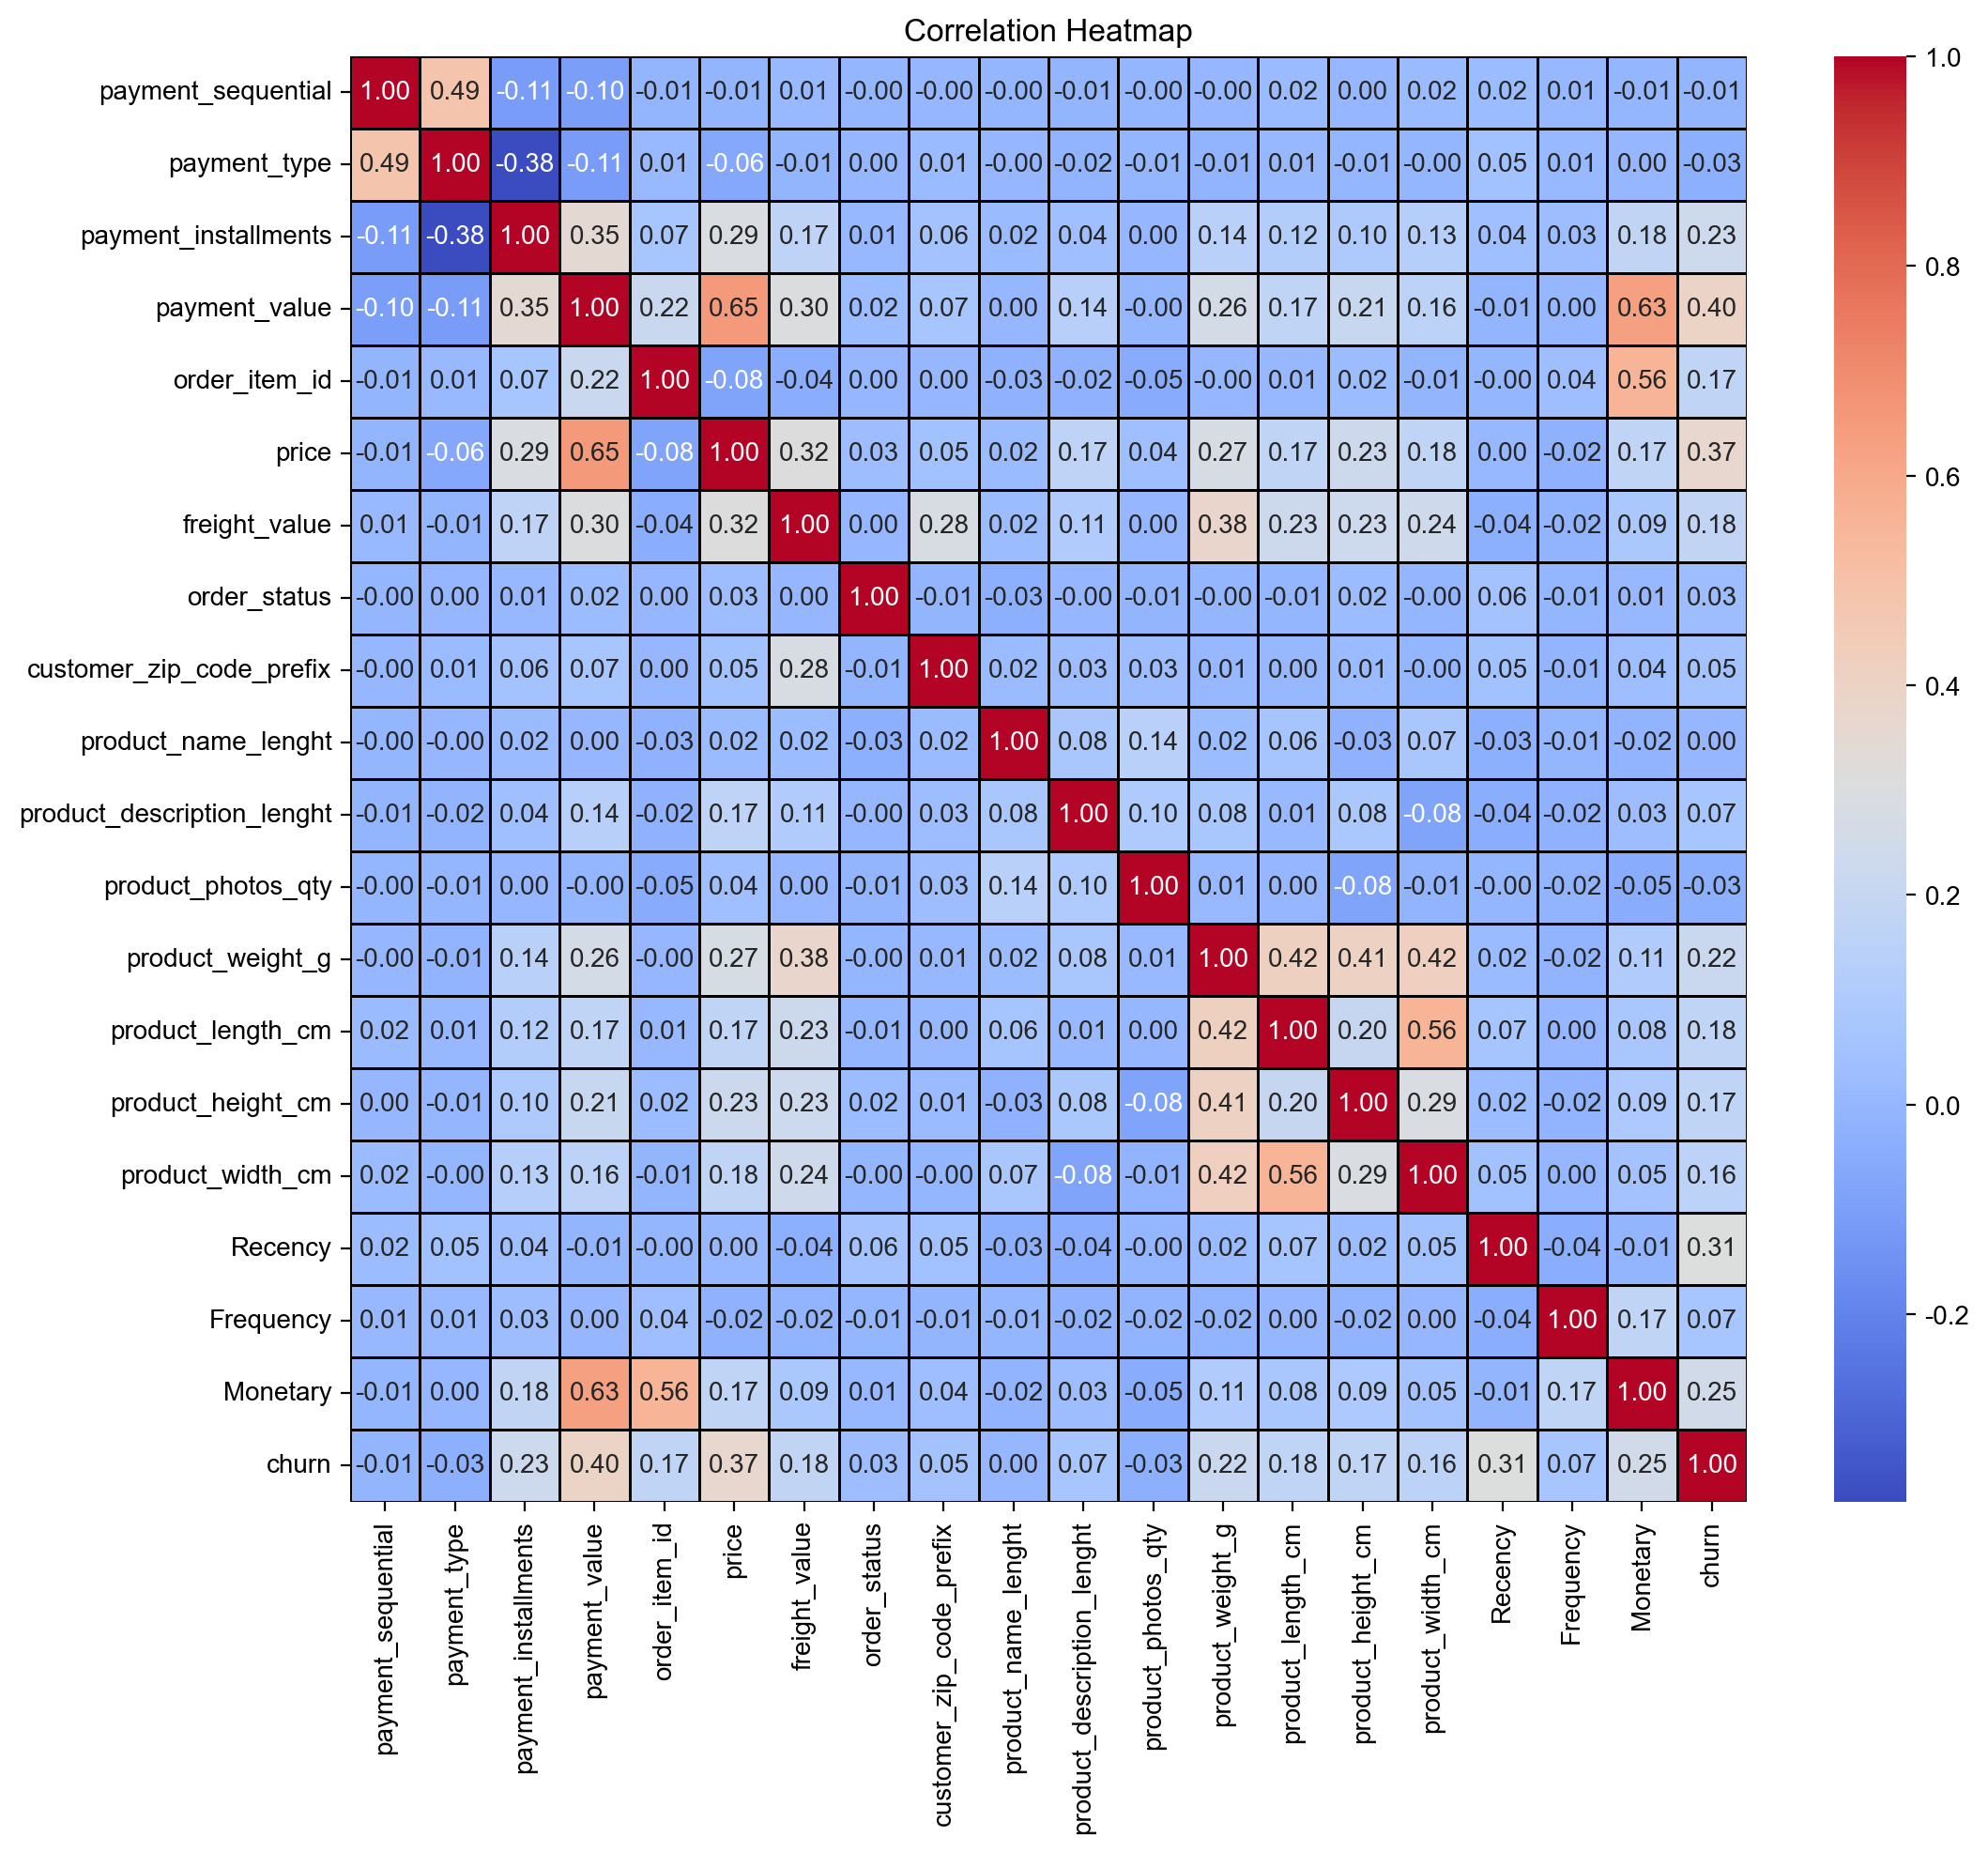

In [74]:
# Select the desired columns
selected_columns = ['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'price', 'freight_value',
       'order_status', 'customer_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'Recency',
       'Frequency', 'Monetary', 'churn']

df_selected = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor = "black")
plt.title('Correlation Heatmap')
plt.show()

In [75]:
columns_to_drop =['payment_sequential', 'payment_type', 'product_name_lenght', 'product_photos_qty']
data = data.drop(columns=columns_to_drop)
data.head(5)

,payment_installments,payment_value,order_item_id,price,freight_value,order_status,customer_zip_code_prefix,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Recency,Frequency,Monetary,churn
0,0.727273,0.101667,1,0.117634,0.288564,0.000000,0.391990,0.334427,0.059480,0.140845,0.454545,0.211538,0.179698,0.0,0.007647,0.0
1,0.363636,0.095925,1,0.117634,0.205674,0.000000,0.139204,0.334427,0.059480,0.140845,0.454545,0.211538,0.193416,0.0,0.007169,0.0
2,0.090909,0.024964,1,0.024063,0.109190,0.000000,0.014337,0.463166,0.011152,0.126761,0.072727,0.096154,0.094650,0.0,0.001261,0.0
3,0.090909,0.067256,1,0.083647,0.128842,0.000000,0.016660,0.558716,0.018587,0.183099,0.109091,0.288462,0.363512,0.0,0.004782,0.0
4,0.090909,0.070511,1,0.083647,0.175827,0.666667,0.369247,0.558716,0.018587,0.183099,0.109091,0.288462,0.517147,0.0,0.005053,0.0


In [76]:
data['churn'].value_counts()

churn
0.0    59107
1.0    56401
Name: count, dtype: int64

### BUILDING LOGISTIC REGRESSION WITH CLUSTERING MODEL

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
X = data.drop(columns='churn')
y = data['churn']

# Perform clustering to create new features
n_clusters = 3  # Choose the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters)
X['cluster'] = kmeans.fit_predict(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build logistic regression model with clustering
model_lr_clustering = make_pipeline(LogisticRegression())
model_lr_clustering.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr_clustering = model_lr_clustering.predict(X_test)

# Evaluate the model
accuracy_lr_clustering = accuracy_score(y_test, y_pred_lr_clustering)
print("Logistic Regression with Clustering Accuracy:", accuracy_lr_clustering)

Logistic Regression with Clustering Accuracy: 0.7805961965774969


In [79]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

In [80]:
# Combine features and labels for cross-validation
data_combined = np.column_stack((X.values, y.values))

# Initialize KFold with 10 folds
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store accuracy scores
accuracy_scores = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(data_combined):
    train_data, test_data = data_combined[train_index], data_combined[test_index]
    
    X_train_cv, y_train_cv = train_data[:, :-1], train_data[:, -1]
    X_test_cv, y_test_cv = test_data[:, :-1], test_data[:, -1]
    
    # Fit and predict using the logistic regression model
    model_lr_clustering.fit(X_train_cv, y_train_cv)
    y_pred_cv = model_lr_clustering.predict(X_test_cv)
    
    # Calculate accuracy and store it in the list
    accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)
    accuracy_scores.append(accuracy_cv)

In [81]:
accuracy_scores

[0.7769890052809281,
 0.7847805384815167,
 0.7796727556055753,
 0.7780278763743399,
 0.775257553458575,
 0.7719677949961042,
 0.775257553458575,
 0.7817504977923989,
 0.7777489177489177,
 0.7816450216450217]

In [82]:
# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy with 10-fold Cross-Validation:", mean_accuracy)

Mean Accuracy with 10-fold Cross-Validation: 0.7783097514841952


### Evaluation of LR Model

In [84]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred_lr_clustering))

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79     17776
         1.0       0.79      0.74      0.77     16877

    accuracy                           0.78     34653
   macro avg       0.78      0.78      0.78     34653
weighted avg       0.78      0.78      0.78     34653



C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


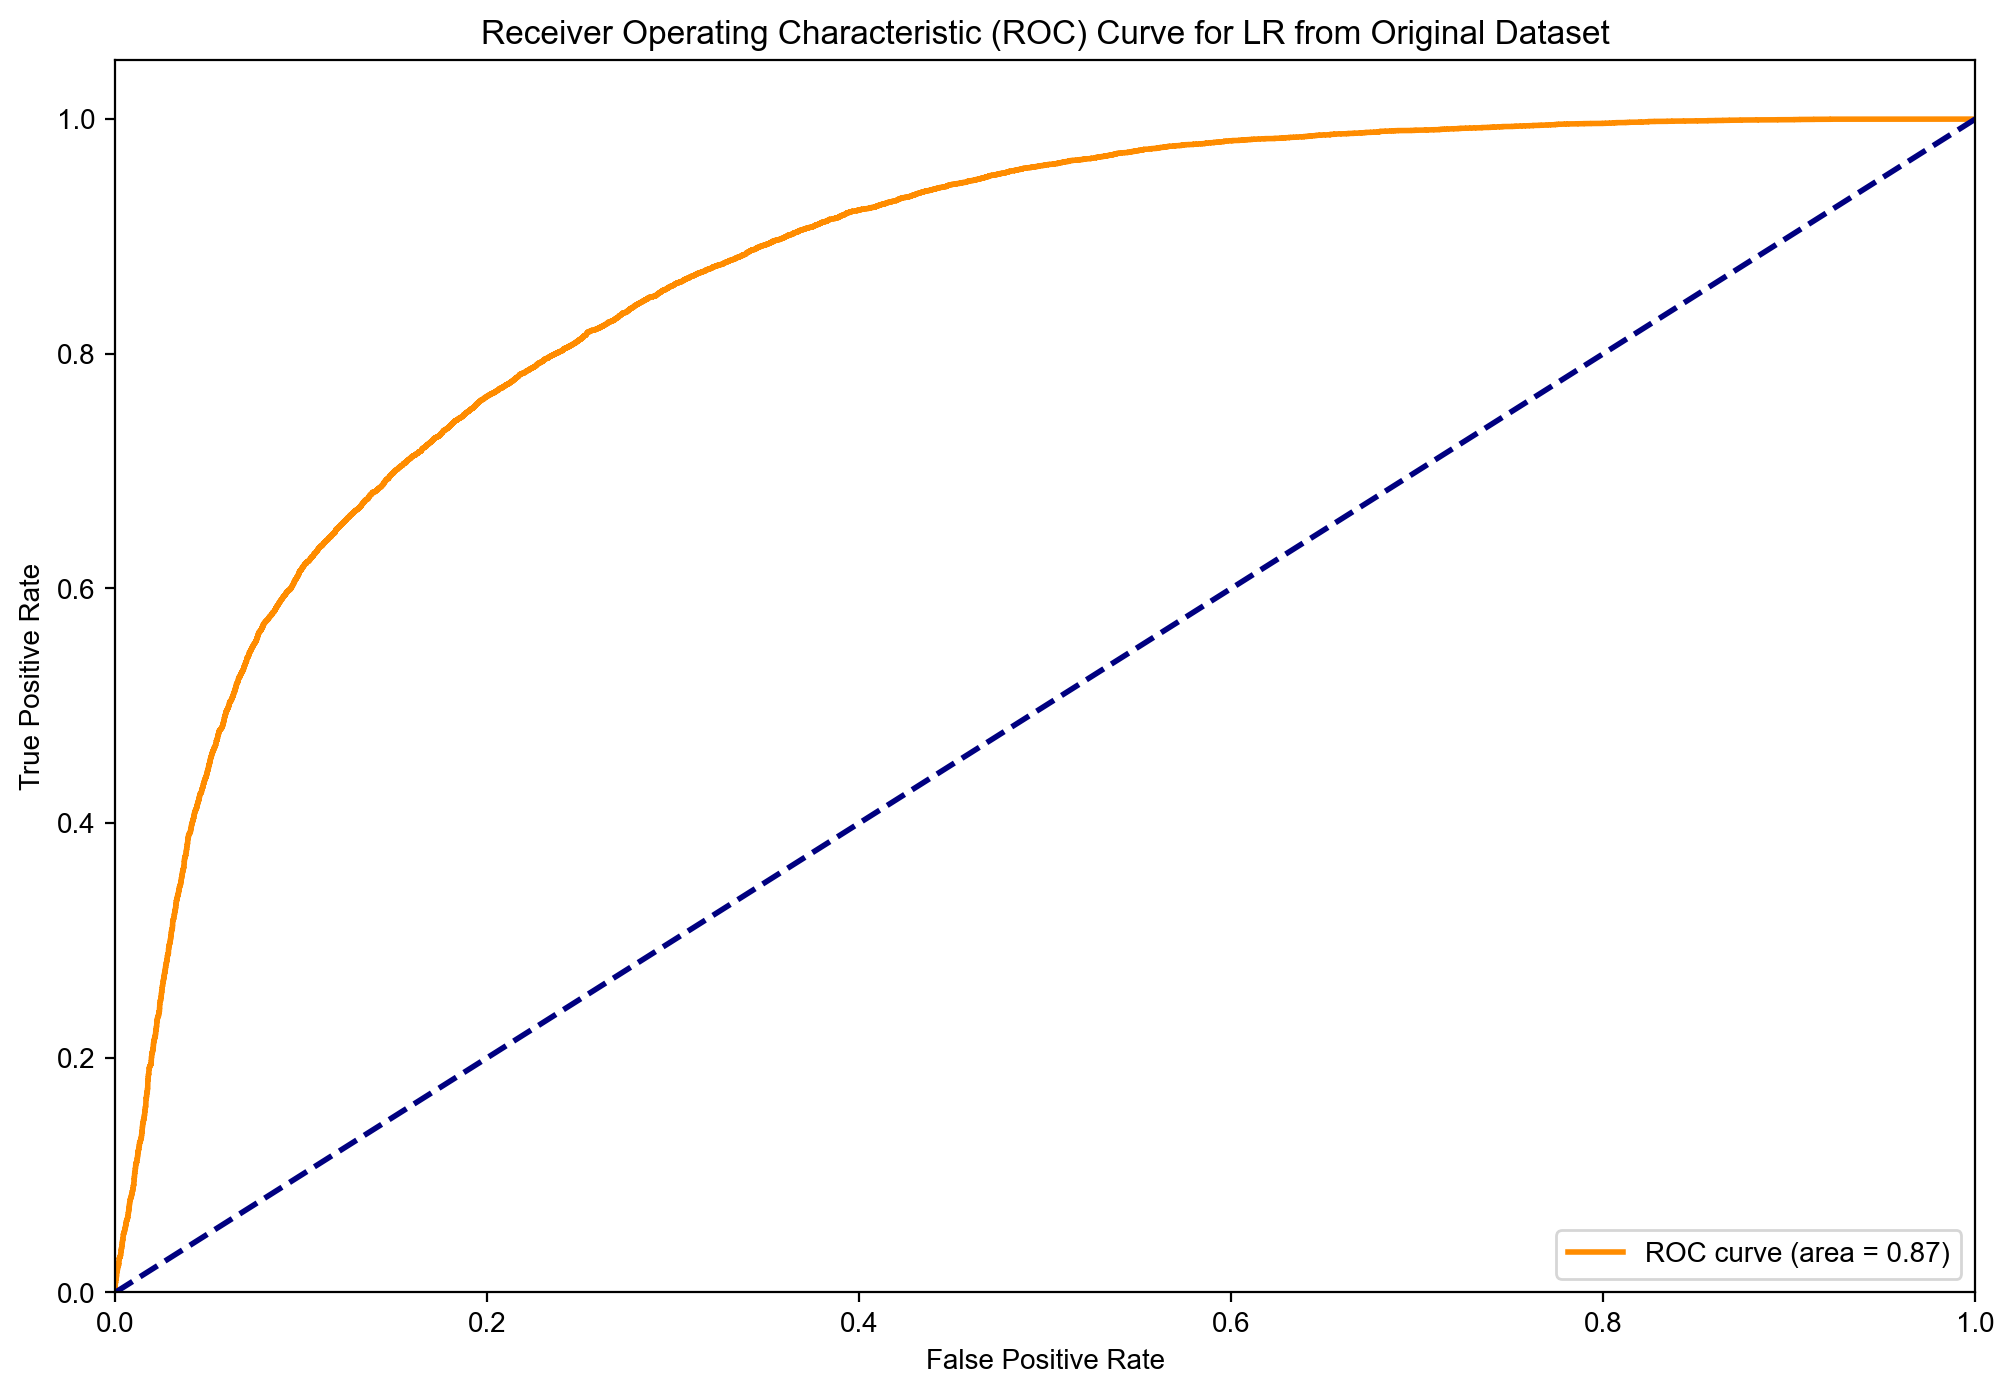

In [85]:
from sklearn.metrics import roc_curve, auc
y_prob_lr_clustering = model_lr_clustering.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_prob_lr_clustering)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LR from Original Dataset')
plt.legend(loc='lower right')
plt.savefig('high_resolution_plot.png', dpi=300)
plt.show()

In [86]:
model_lr_clustering = LogisticRegression()
model_lr_clustering.fit(X, y)

# Predict on the test data
y_pred_lr_clustering = model_lr_clustering.predict(X_test)
print(y_pred_lr_clustering[:10])

[1. 1. 1. 0. 0. 1. 1. 0. 1. 0.]


In [87]:
for i in range(len(y_pred_lr_clustering)):
    if y_pred_lr_clustering[i]>=0.5:
        y_pred_lr_clustering[i]=1
    else:
        y_pred_lr_clustering[i]=0

In [88]:
y_test[:10]

72225     1.0
79231     1.0
36922     0.0
91198     0.0
40961     1.0
505       1.0
104780    0.0
73322     0.0
114249    1.0
26933     1.0
Name: churn, dtype: float64

### Build ANN Model

In [90]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

threshold = 0.5
y_binary = (y > threshold).astype(int)

# Standardize the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=42)

# Build the ANN model
model_ann = Sequential()
model_ann.add(Dense(10, input_dim=X_scaled.shape[1], activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
model_ann.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print("Artificial Neural Networks Accuracy:", accuracy_ann)

# Make predictions and generate the classification report
y_pred_ann = model_ann.predict(X_test)
y_pred_ann_binary = (y_pred_ann > 0.5).astype(int)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_ann_binary, target_names=["Class 0", "Class 1"])

# Print the classification report
print("Classification Report for Artificial Neural Networks:\n")
print(classification_rep)

Epoch 1/10
2527/2527 [==============================] - 7s 3ms/step - loss: 0.3591 - accuracy: 0.8520
Epoch 2/10
2527/2527 [==============================] - 6s 3ms/step - loss: 0.1682 - accuracy: 0.9489
Epoch 3/10
2527/2527 [==============================] - 6s 3ms/step - loss: 0.1329 - accuracy: 0.9590
Epoch 4/10
2527/2527 [==============================] - 6s 2ms/step - loss: 0.1142 - accuracy: 0.9645
Epoch 5/10
2527/2527 [==============================] - 6s 2ms/step - loss: 0.1006 - accuracy: 0.9689
Epoch 6/10
2527/2527 [==============================] - 6s 2ms/step - loss: 0.0895 - accuracy: 0.9732
Epoch 7/10
2527/2527 [==============================] - 6s 2ms/step - loss: 0.0804 - accuracy: 0.9764
Epoch 8/10
2527/2527 [==============================] - 6s 2ms/step - loss: 0.0718 - accuracy: 0.9788
Epoch 9/10
2527/2527 [==============================] - 6s 2ms/step - loss: 0.0649 - accuracy: 0.9818
Epoch 10/10
1083/1083 [==============================] - 2s 2ms/step - loss: 0.056

1083/1083 [==============================] - 3s 2ms/step


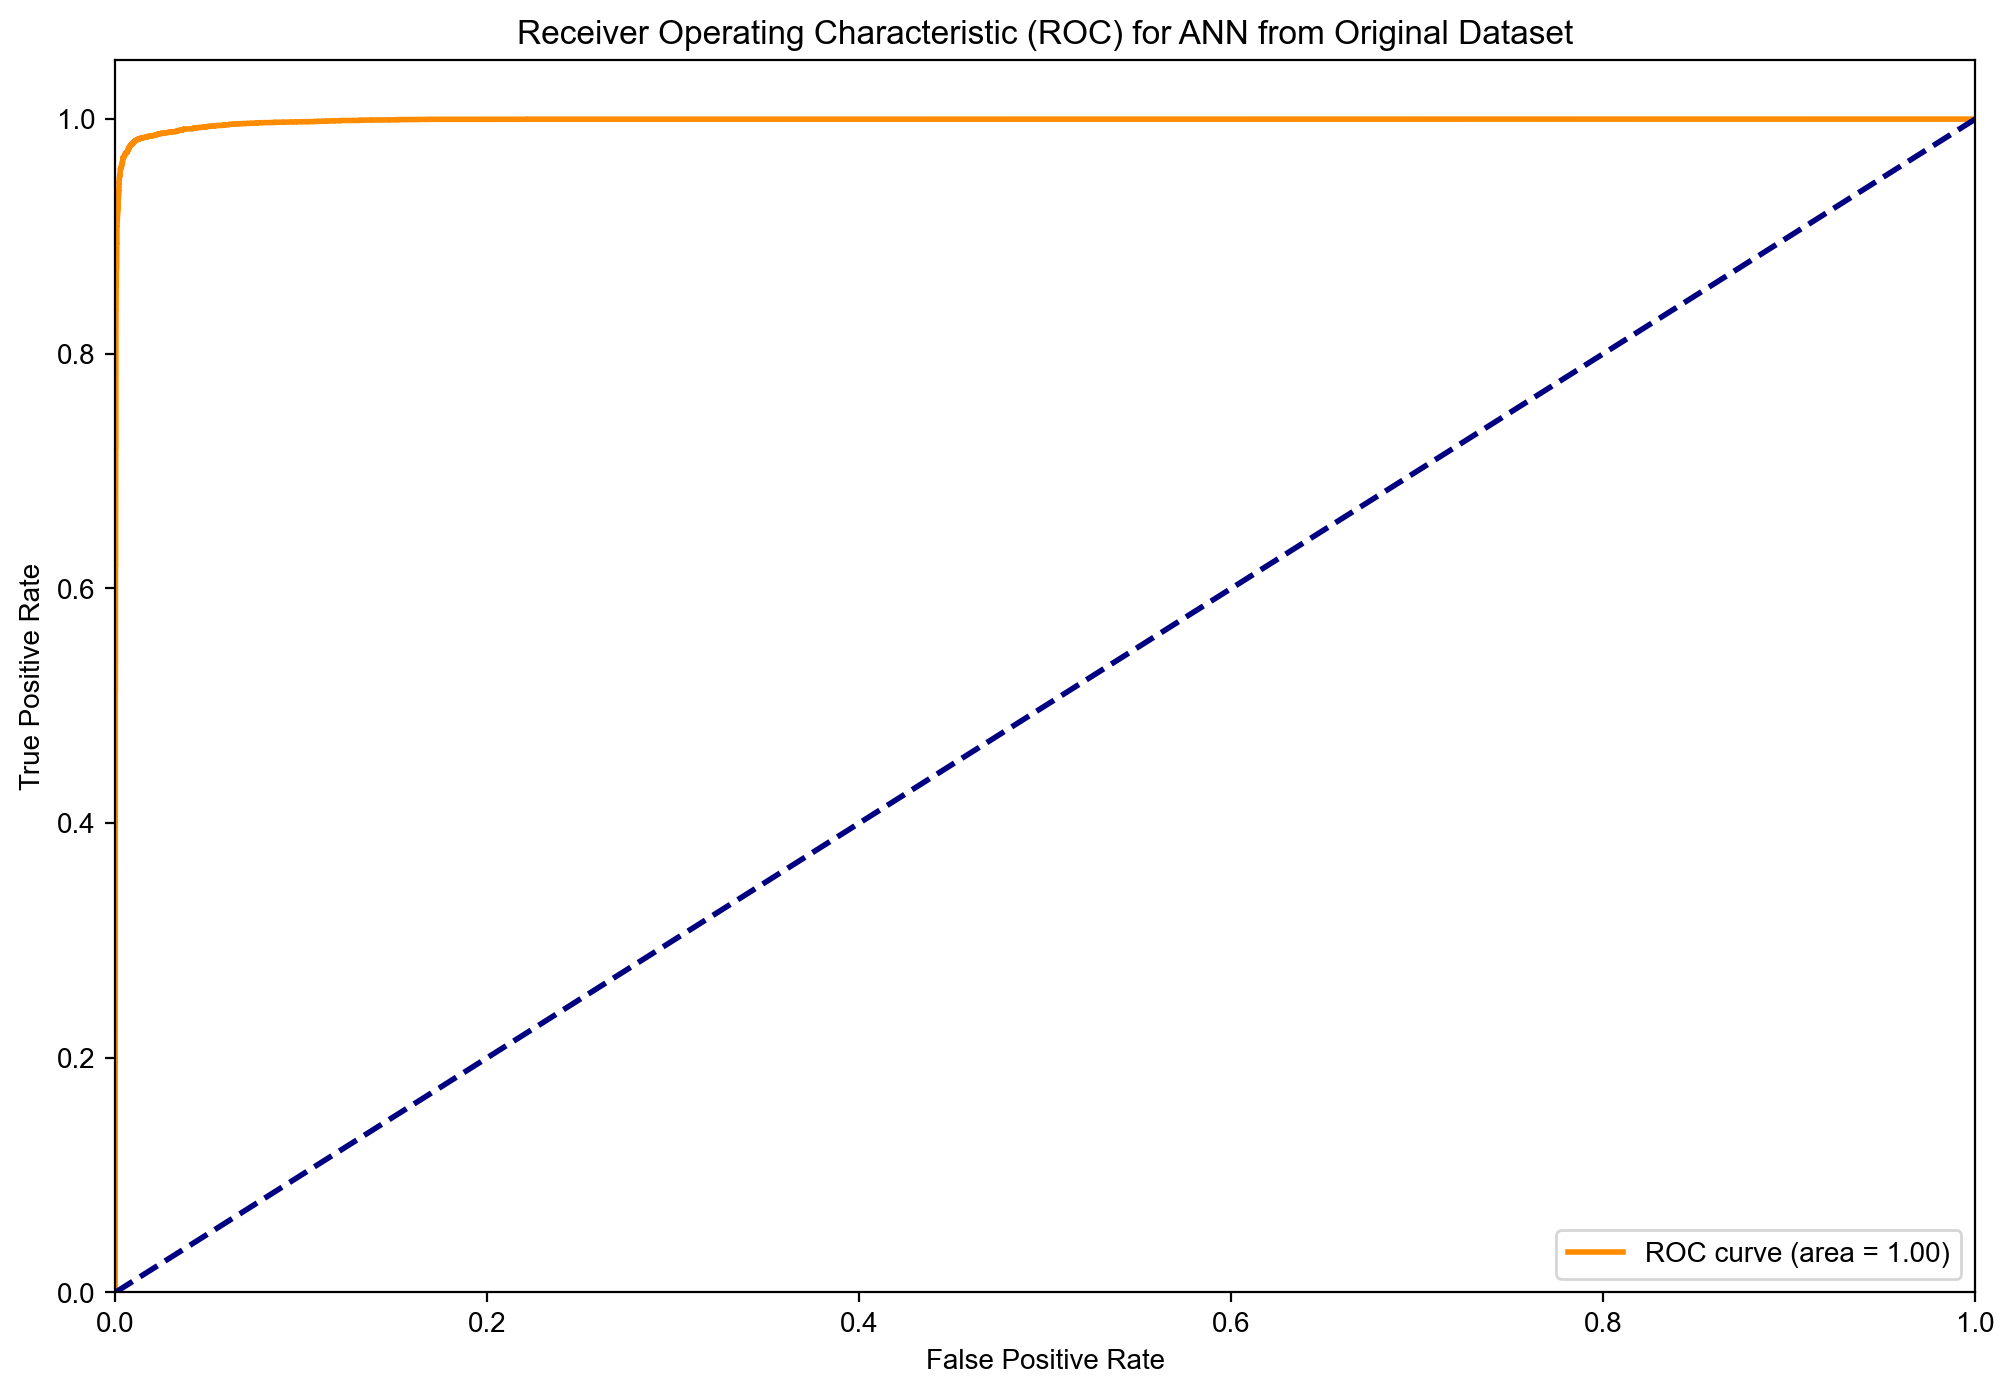

In [91]:
y_pred_ann_probs = model_ann.predict(X_test)

# Calculate ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_pred_ann_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for ANN from Original Dataset')
plt.legend(loc='lower right')
plt.show()

### Build CNN Model

In [92]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for 1D CNN
input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary classes (0 or 1)

# Evaluate the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_classes)
print("CNN Accuracy:", accuracy_cnn)

Epoch 1/10
2527/2527 [==============================] - 18s 6ms/step - loss: 0.1299 - accuracy: 0.9494 - val_loss: 0.0471 - val_accuracy: 0.9853
Epoch 2/10
2527/2527 [==============================] - 17s 7ms/step - loss: 0.0458 - accuracy: 0.9824 - val_loss: 0.0327 - val_accuracy: 0.9894
Epoch 3/10
2527/2527 [==============================] - 17s 7ms/step - loss: 0.0320 - accuracy: 0.9877 - val_loss: 0.0257 - val_accuracy: 0.9901
Epoch 4/10
2527/2527 [==============================] - 16s 6ms/step - loss: 0.0276 - accuracy: 0.9891 - val_loss: 0.0229 - val_accuracy: 0.9916
Epoch 5/10
2527/2527 [==============================] - 15s 6ms/step - loss: 0.0231 - accuracy: 0.9905 - val_loss: 0.0187 - val_accuracy: 0.9923
Epoch 6/10
2527/2527 [==============================] - 15s 6ms/step - loss: 0.0208 - accuracy: 0.9918 - val_loss: 0.0176 - val_accuracy: 0.9933
Epoch 7/10
2527/2527 [==============================] - 15s 6ms/step - loss: 0.0197 - accuracy: 0.9923 - val_loss: 0.0167 - val_ac

In [93]:
# Make predictions on the test set
y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary classes (0 or 1)

# Generate the classification report
classification_rep_cnn = classification_report(y_test, y_pred_classes, target_names=["Class 0", "Class 1"])

# Print the classification report
print("Classification Report for CNN:\n")
print(classification_rep_cnn)

1083/1083 [==============================] - 3s 3ms/step
Classification Report for CNN:

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99     17776
     Class 1       1.00      0.97      0.99     16877

    accuracy                           0.99     34653
   macro avg       0.99      0.99      0.99     34653
weighted avg       0.99      0.99      0.99     34653



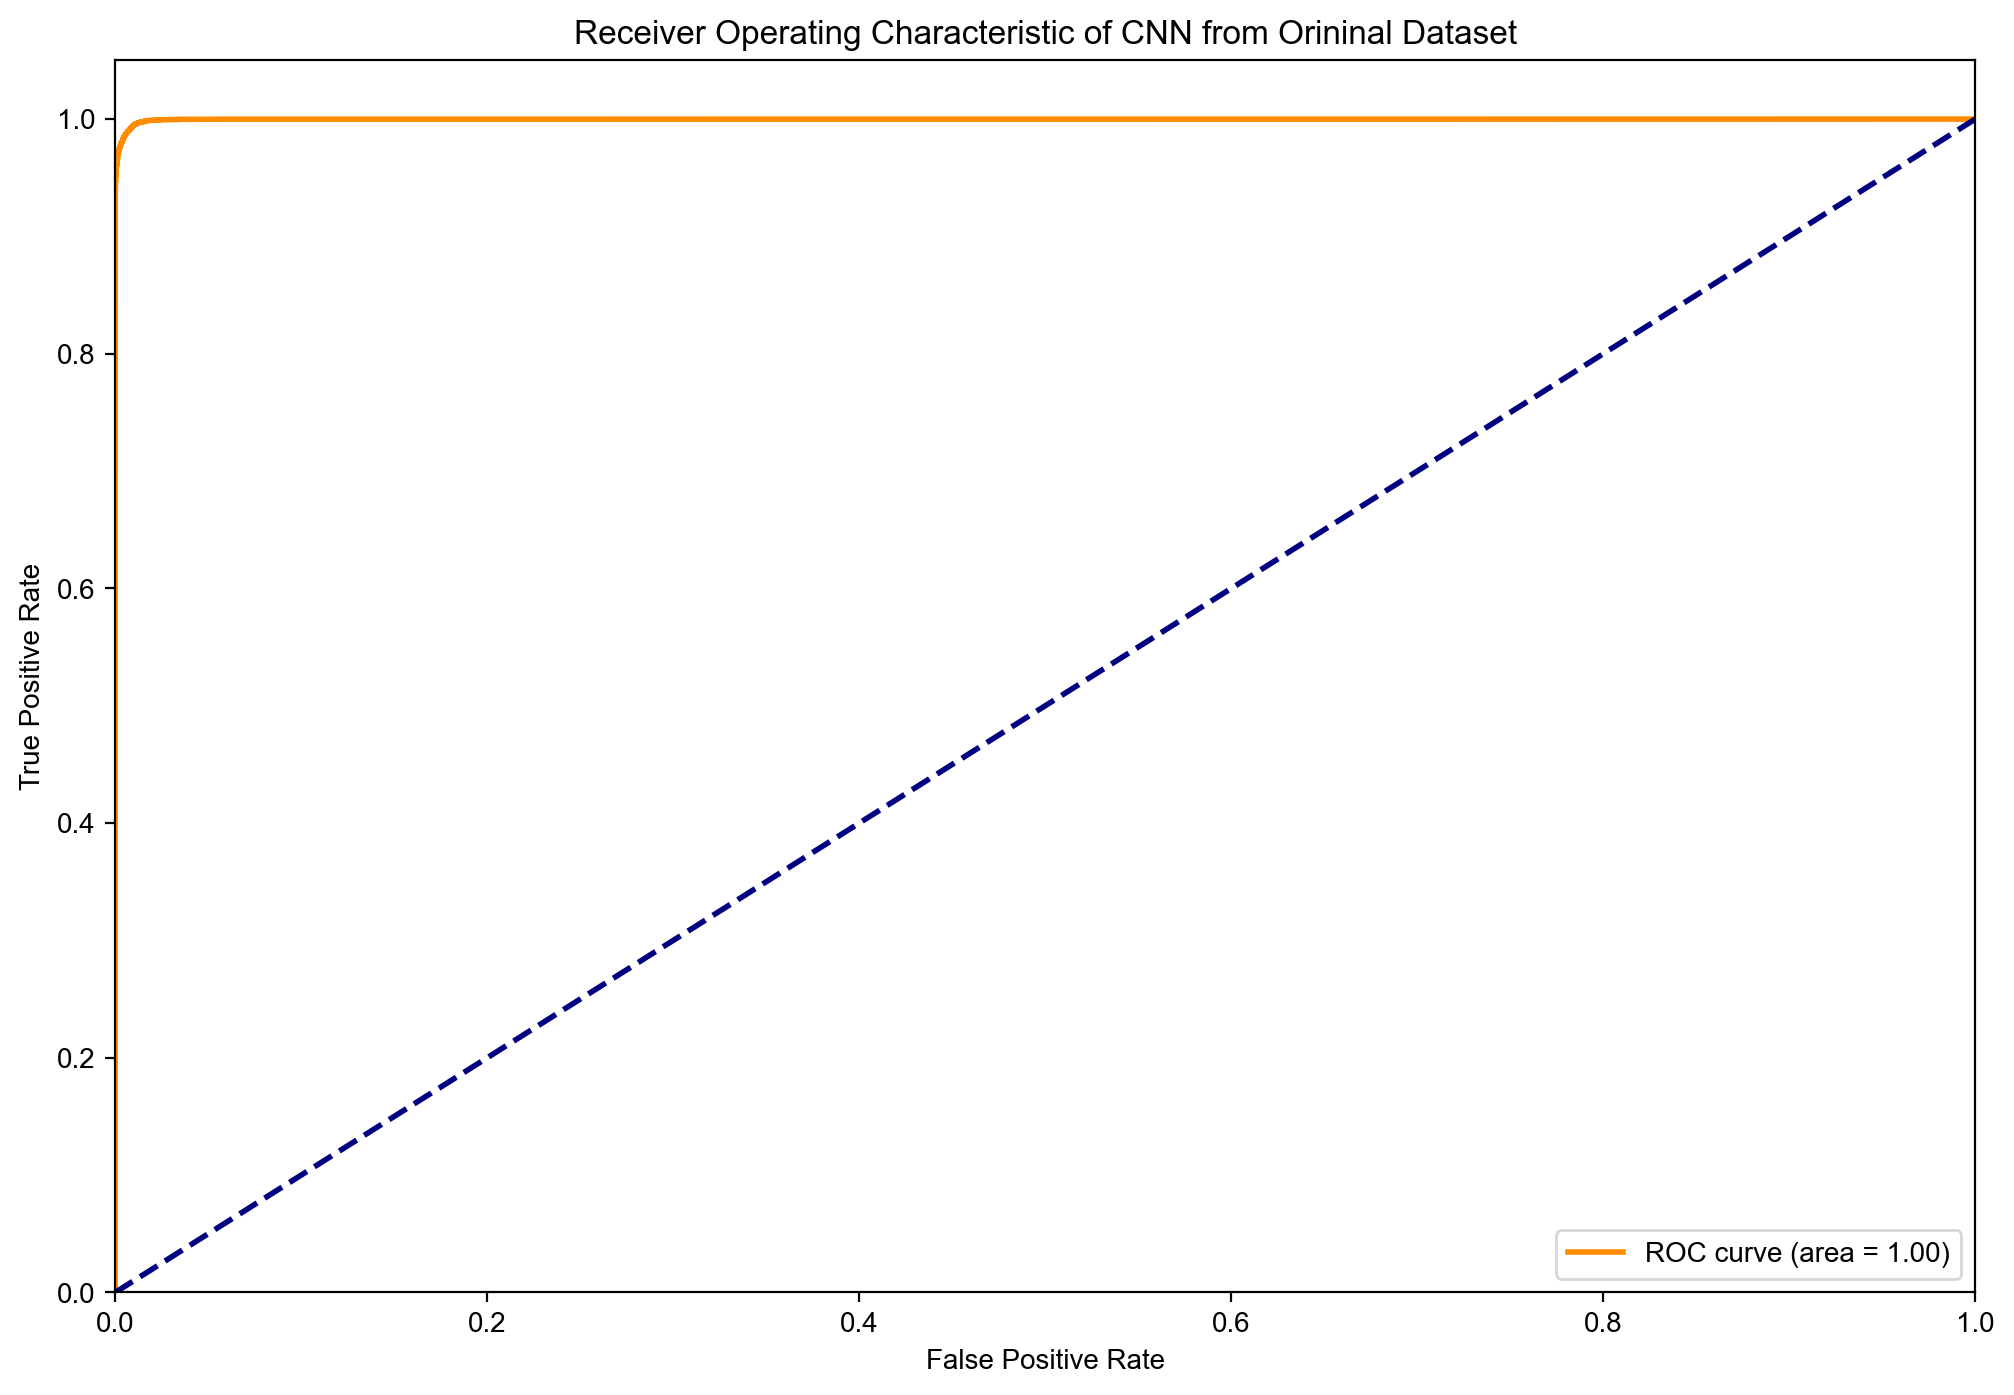

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of CNN from Orininal Dataset')
plt.legend(loc='lower right')
plt.show()

### LR IMBALANCE CHECK

In [95]:
y_test.value_counts()

churn
0.0    17776
1.0    16877
Name: count, dtype: int64

In [96]:
count_class_0, count_class_1 = data.churn.value_counts()

# Divide by class
df_class_0 = data[data['churn'] == 0]
df_class_1 = data[data['churn'] == 1]

In [97]:
count_class_0, count_class_1

(59107, 56401)

In [98]:
df_class_0.shape

(59107, 16)

In [99]:
df_class_1.shape

(56401, 16)

#### UNDERSAMPLING

In [103]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.churn.value_counts())

Random under-sampling:
churn
0.0    56401
1.0    56401
Name: count, dtype: int64


In [104]:
X = df_test_under.drop('churn',axis='columns')
y = df_test_under['churn']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model_lr_clustering = make_pipeline(LogisticRegression())
model_lr_clustering.fit(X_train, y_train)
y_pred_lr_clustering = model_lr_clustering.predict(X_test)

accuracy_lr_clustering = accuracy_score(y_test, y_pred_lr_clustering)
print("Logistic Regression with Clustering Accuracy:", accuracy_lr_clustering)

from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred_lr_clustering))

Logistic Regression with Clustering Accuracy: 0.7746110544745357
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     11281
         1.0       0.79      0.74      0.77     11280

    accuracy                           0.77     22561
   macro avg       0.78      0.77      0.77     22561
weighted avg       0.78      0.77      0.77     22561



In [112]:
model_lr_clustering = make_pipeline(LogisticRegression())
model_lr_clustering.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logisticregression', LogisticRegression())])

In [113]:
y_pred_lr_clustering = model_lr_clustering.predict(X_test)

accuracy_lr_clustering = accuracy_score(y_test, y_pred_lr_clustering)
print("Logistic Regression with Clustering Accuracy:", accuracy_lr_clustering)

from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred_lr_clustering))

Logistic Regression with Clustering Accuracy: 0.7437170338194229
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     11281
           1       0.75      0.73      0.74     11280

    accuracy                           0.74     22561
   macro avg       0.74      0.74      0.74     22561
weighted avg       0.74      0.74      0.74     22561



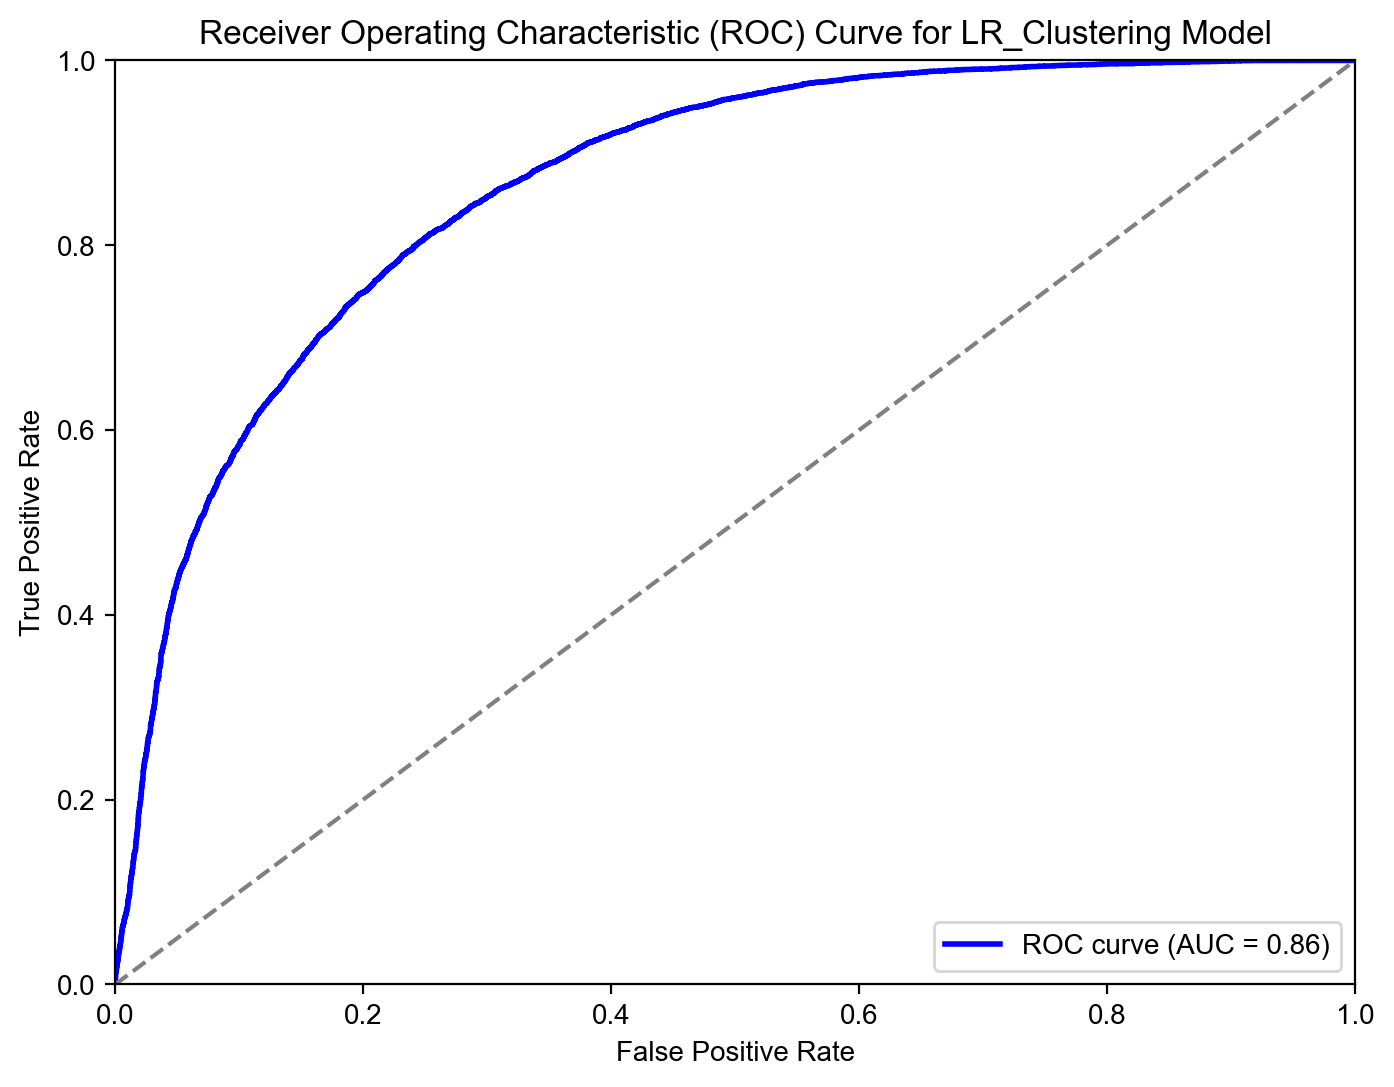

In [108]:
from sklearn.metrics import roc_curve, auc
# Generate ROC curve and calculate AUC
y_pred_probs = model_lr_clustering.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LR_Clustering Model')
plt.legend(loc='lower right')
plt.show()

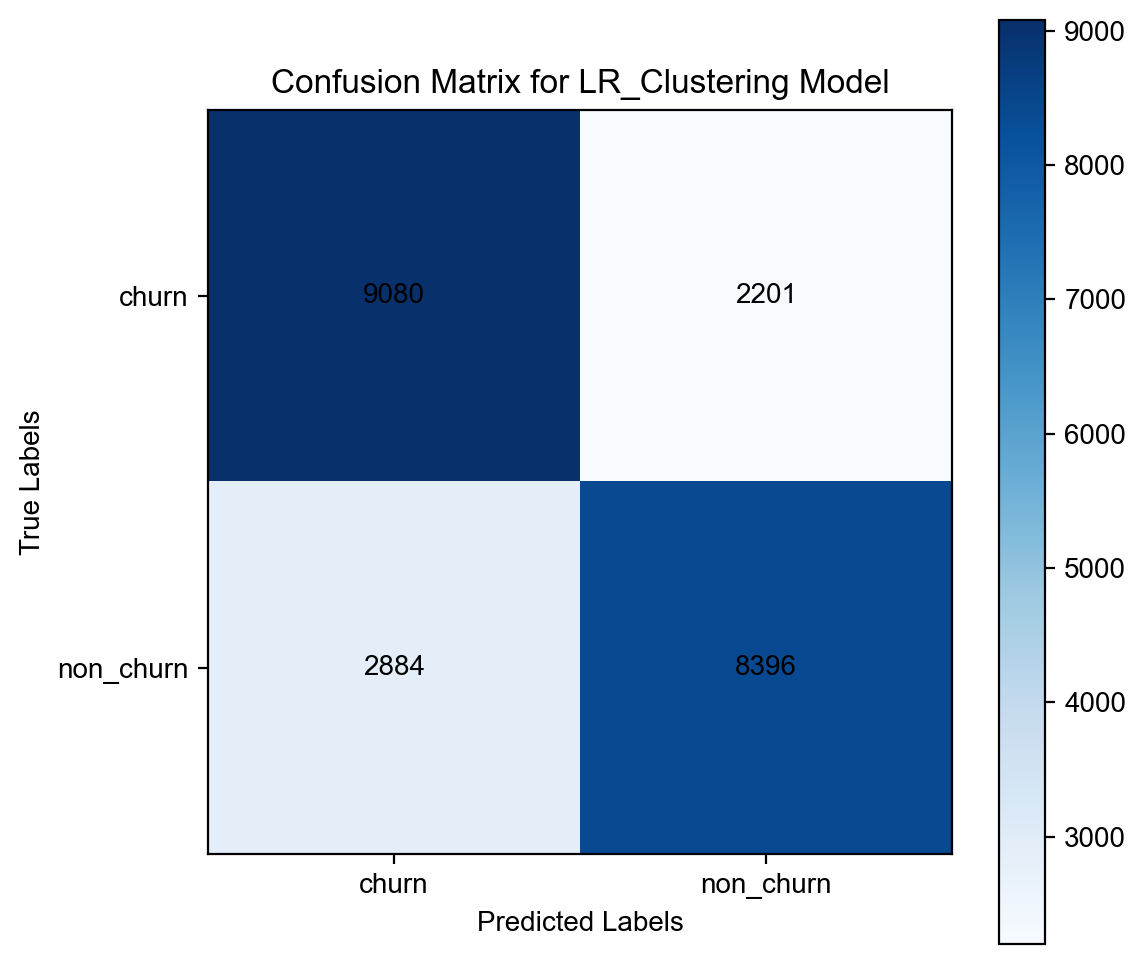

In [109]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_clustering)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for LR_Clustering Model')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['churn', 'non_churn'])
plt.yticks(tick_marks, ['churn', 'non_churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
plt.show()

### ANN IMBALANCE CHECK

In [110]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.churn.value_counts())

Random under-sampling:
churn
0.0    56401
1.0    56401
Name: count, dtype: int64


In [111]:
X = df_test_under.drop('churn', axis='columns')
y = df_test_under['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build the ANN model
model_ann = Sequential()
model_ann.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Use X_train.shape[1] instead of X_scaled.shape[1]
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
accuracy_ann = model_ann.evaluate(X_test, y_test)
print("Artificial Neural Networks Accuracy:", accuracy_ann)

Epoch 1/10
2821/2821 [==============================] - 25s 3ms/step - loss: 0.5260 - accuracy: 0.7529
Epoch 2/10
2821/2821 [==============================] - 7s 2ms/step - loss: 0.4647 - accuracy: 0.7902
Epoch 3/10
2821/2821 [==============================] - 7s 2ms/step - loss: 0.3993 - accuracy: 0.8345
Epoch 4/10
2821/2821 [==============================] - 6s 2ms/step - loss: 0.3096 - accuracy: 0.8897
Epoch 5/10
2821/2821 [==============================] - 7s 2ms/step - loss: 0.2497 - accuracy: 0.9249
Epoch 6/10
2821/2821 [==============================] - 7s 2ms/step - loss: 0.2159 - accuracy: 0.9408
Epoch 7/10
2821/2821 [==============================] - 6s 2ms/step - loss: 0.1954 - accuracy: 0.9491
Epoch 8/10
2821/2821 [==============================] - 7s 2ms/step - loss: 0.1813 - accuracy: 0.9533
Epoch 9/10
2821/2821 [==============================] - 7s 2ms/step - loss: 0.1707 - accuracy: 0.9561
Epoch 10/10
706/706 [==============================] - 2s 2ms/step - loss: 0.1619

In [112]:
y_pred = model_ann.predict(X_test)

# Convert predictions to binary values (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Show the classification report
target_names = ['churn', 'non_churn']  # Replace with actual class names if available
print(classification_report(y_test, y_pred, target_names=target_names))

706/706 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

       churn       0.95      0.96      0.96     11281
   non_churn       0.96      0.95      0.96     11280

    accuracy                           0.96     22561
   macro avg       0.96      0.96      0.96     22561
weighted avg       0.96      0.96      0.96     22561



#### ANN PLOTS

In [113]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [114]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (22561, 15)
Shape of y_test: (22561,)


706/706 [==============================] - 1s 2ms/step


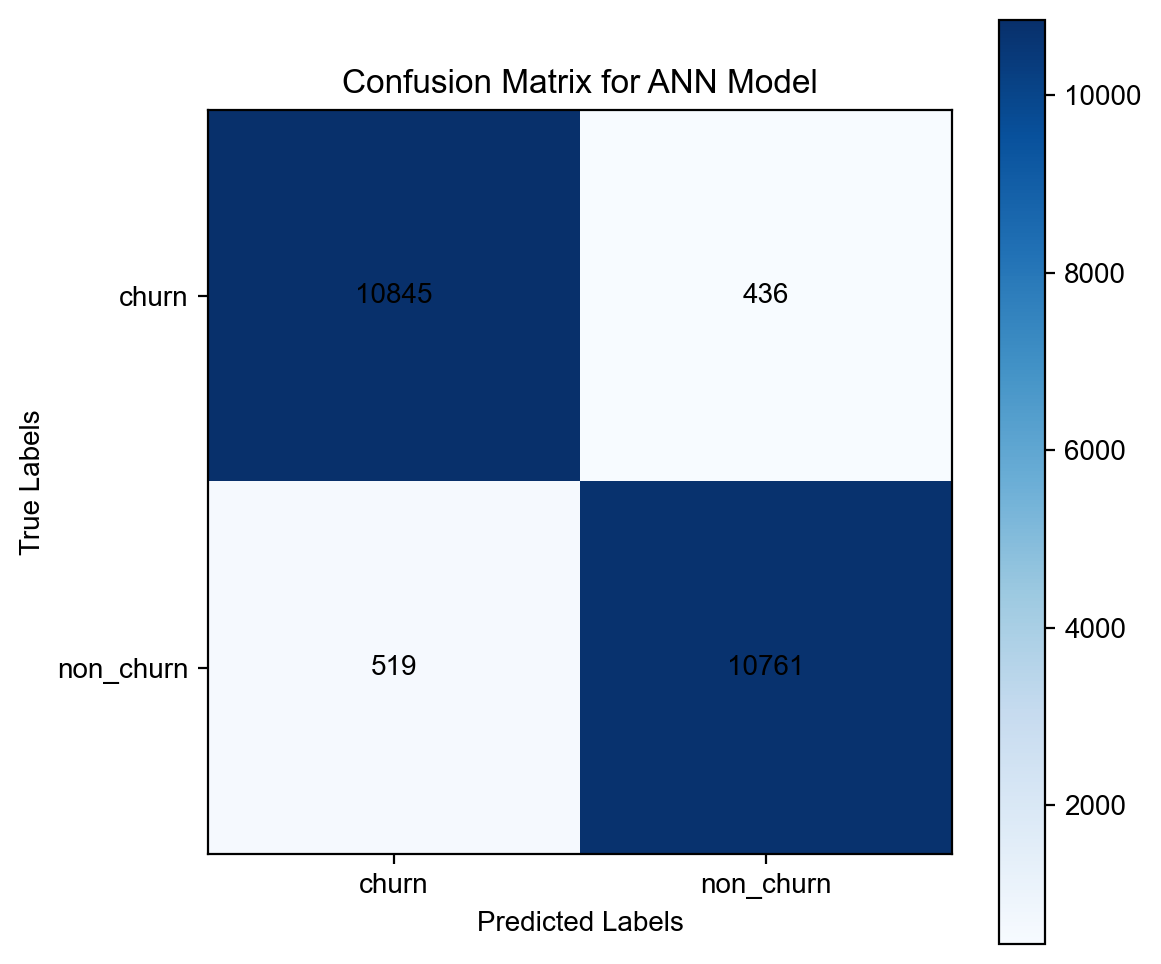

In [115]:
# Assuming you have already trained the model and obtained the probabilities for the test set
y_pred_probs = model_ann.predict(X_test)

# Convert probabilities to binary classes (0 or 1) using a threshold (e.g., 0.5)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ANN Model')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['churn', 'non_churn'])
plt.yticks(tick_marks, ['churn', 'non_churn'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
plt.show()

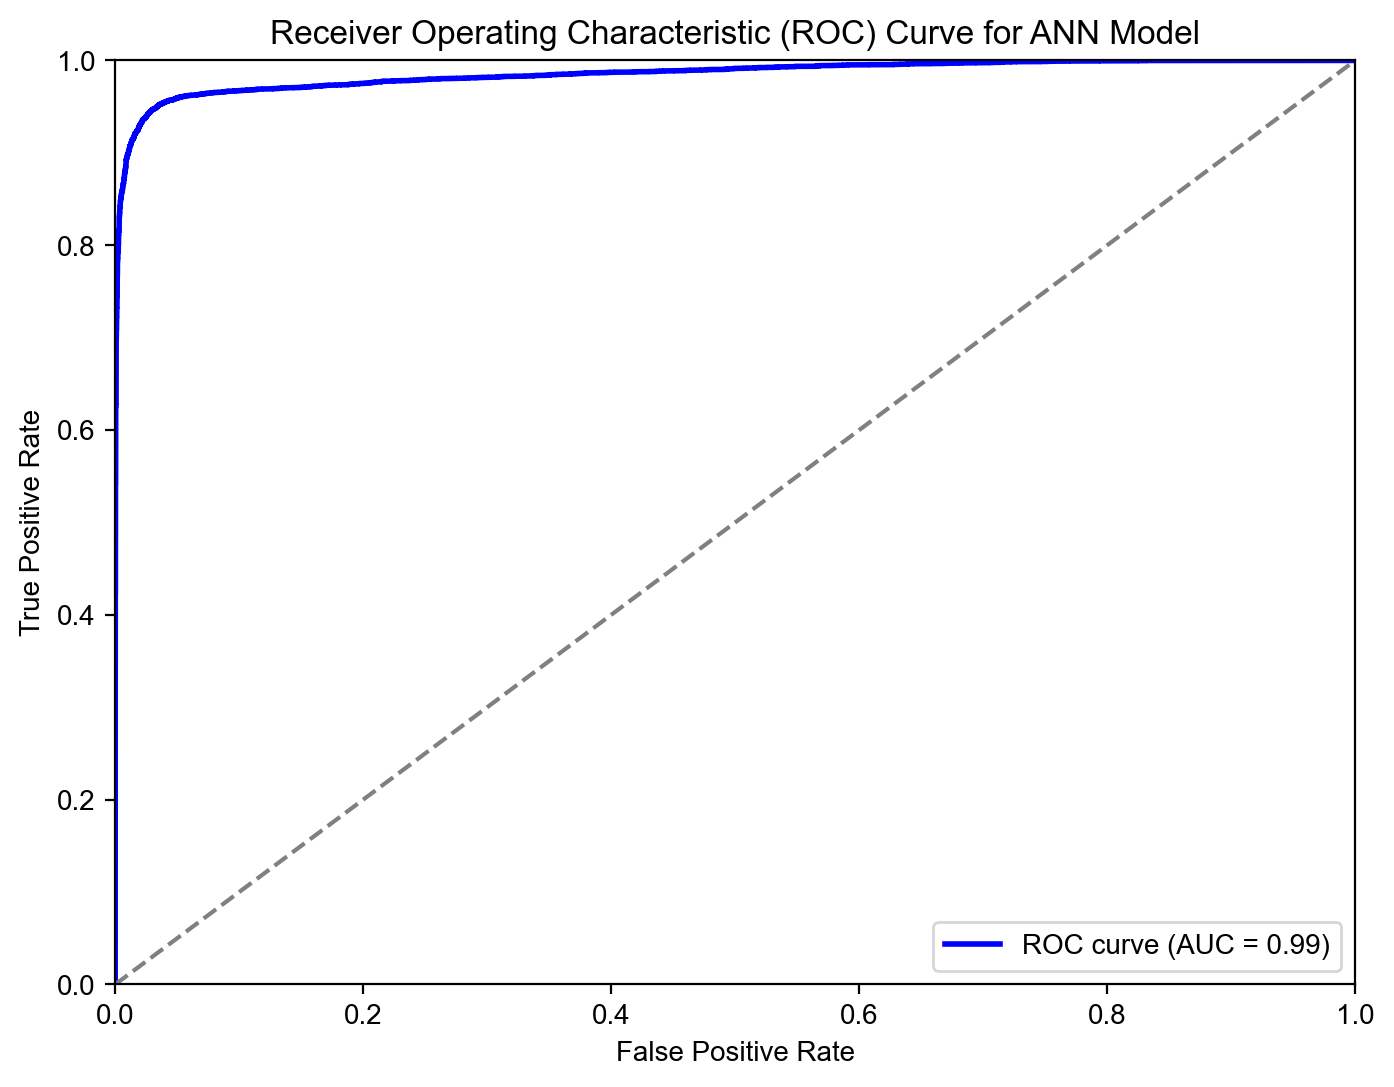

In [116]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN Model')
plt.legend(loc='lower right')
plt.show()

### CNN IMBALANCE CHECK

In [117]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.churn.value_counts())

Random under-sampling:
churn
0.0    56401
1.0    56401
Name: count, dtype: int64


In [118]:
X = df_test_under.drop('churn', axis='columns')
y = df_test_under['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [119]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for 1D CNN
input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary classes (0 or 1)

# Evaluate the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_classes)
print("CNN Accuracy:", accuracy_cnn)

Epoch 1/10
2821/2821 [==============================] - 16s 5ms/step - loss: 0.1587 - accuracy: 0.9394 - val_loss: 0.1004 - val_accuracy: 0.9637
Epoch 2/10
2821/2821 [==============================] - 13s 5ms/step - loss: 0.0708 - accuracy: 0.9754 - val_loss: 0.0555 - val_accuracy: 0.9817
Epoch 3/10
2821/2821 [==============================] - 13s 5ms/step - loss: 0.0583 - accuracy: 0.9795 - val_loss: 0.0641 - val_accuracy: 0.9786
Epoch 4/10
2821/2821 [==============================] - 14s 5ms/step - loss: 0.0519 - accuracy: 0.9824 - val_loss: 0.0627 - val_accuracy: 0.9776
Epoch 5/10
2821/2821 [==============================] - 14s 5ms/step - loss: 0.0485 - accuracy: 0.9833 - val_loss: 0.0582 - val_accuracy: 0.9781
Epoch 6/10
2821/2821 [==============================] - 13s 5ms/step - loss: 0.0432 - accuracy: 0.9854 - val_loss: 0.0381 - val_accuracy: 0.9869
Epoch 7/10
2821/2821 [==============================] - 13s 5ms/step - loss: 0.0415 - accuracy: 0.9856 - val_loss: 0.0411 - val_ac

In [120]:
y_pred_probs = model.predict(X_test_reshaped)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Generate the classification report
target_names = ['class_0', 'class_1']  # Replace with actual class names if available
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

706/706 [==============================] - 2s 3ms/step
Classification Report:
              precision    recall  f1-score   support

     class_0       0.99      0.99      0.99     11281
     class_1       0.99      0.99      0.99     11280

    accuracy                           0.99     22561
   macro avg       0.99      0.99      0.99     22561
weighted avg       0.99      0.99      0.99     22561



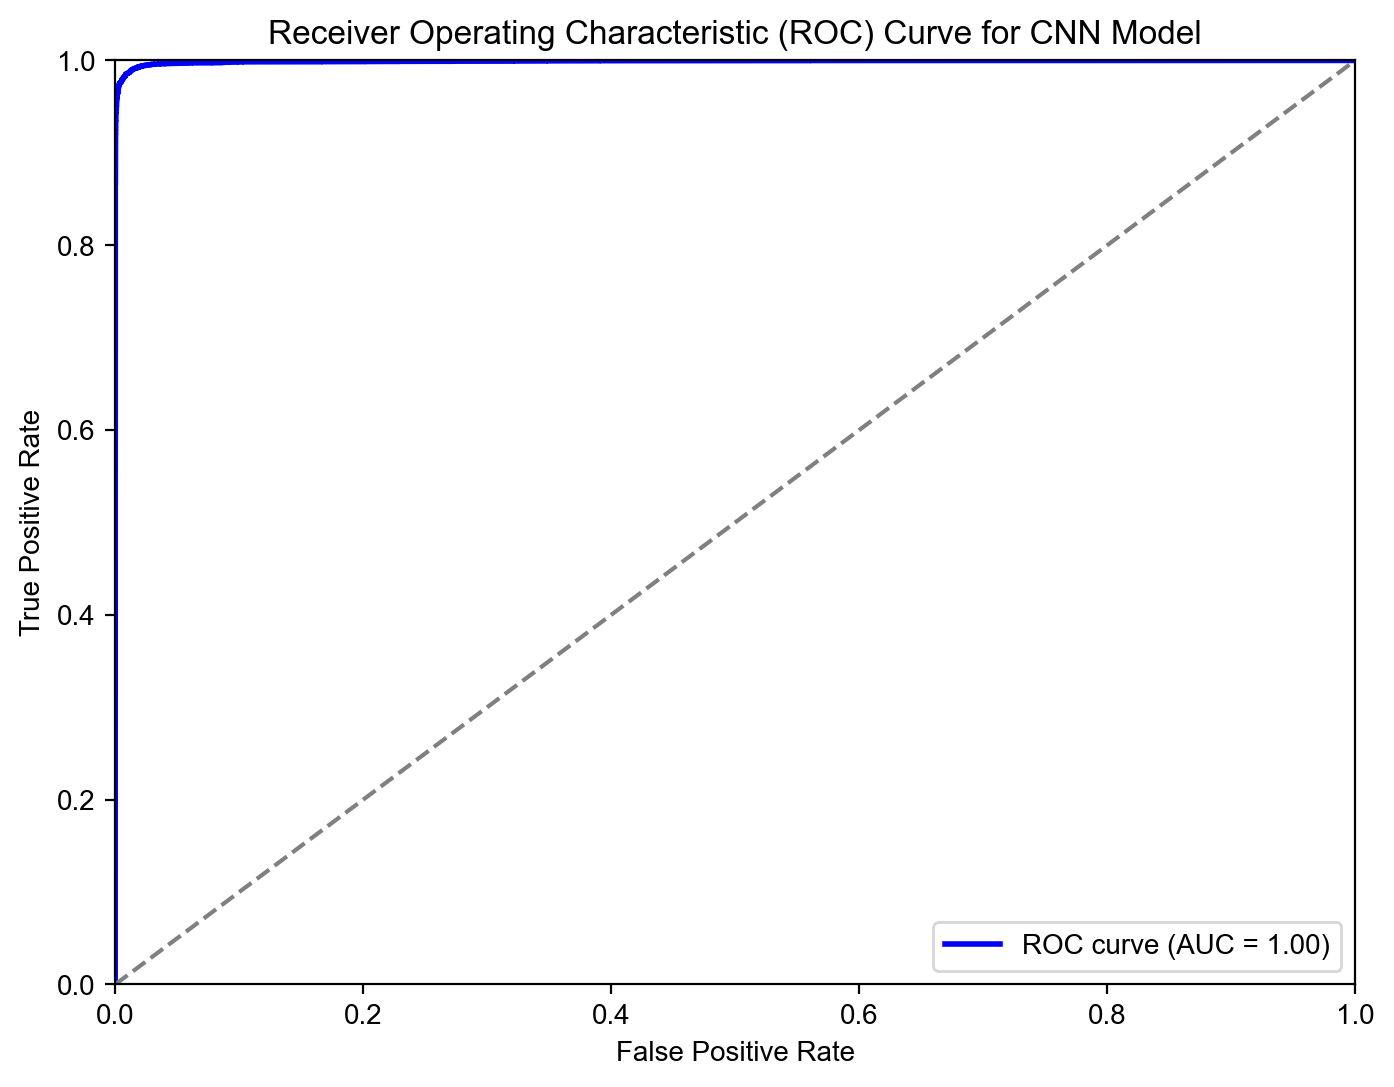

In [121]:
# Generate ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CNN Model')
plt.legend(loc='lower right')
plt.show()

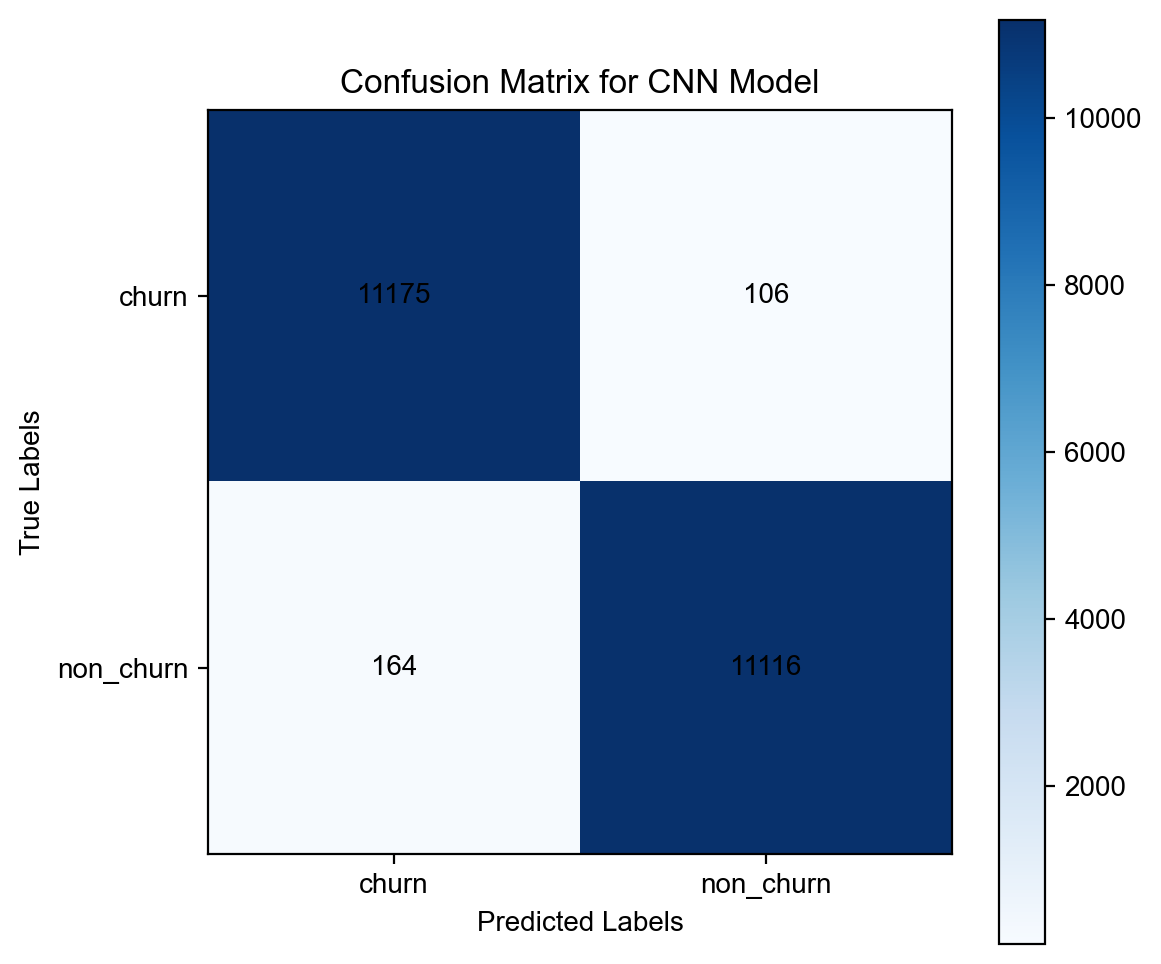

In [122]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix for CNN Model')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['churn', 'non_churn'])
plt.yticks(tick_marks, ['churn', 'non_churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')
plt.show()

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load DL Packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [124]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 13, 64)            256       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               49280     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 49665 (194.00 KB)
Trainable params: 49665 (194.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [128]:
num_features = X_train_scaled.shape[1]
print("Number of features:", num_features)

Number of features: 15


In [127]:
# Get the shape of the dataframe
shape = X_train_scaled.shape

# Get the number of features
number_of_features = shape[1]

# Print the number of features
print("The number of features in the dataframe is:", number_of_features)

The number of features in the dataframe is: 15


In [164]:
from tensorflow.keras.utils import plot_model

In [166]:
!pip install pydot
# Visualize
plot_model(model, to_file='CNN_model_png', show_shapes=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
